# Unsupervised Data Analysis

In [ ]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [ ]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [4]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [1]:
import os
import time
import datetime
import glob
import urllib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats
import pingouin as pg

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

## Data load

In [ ]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

x_digits, y_digits = load_digits(return_X_y=True)

mtcars = pd.read_csv('./r_csv/datasets/mtcars.csv', index_col='Unnamed: 0')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
cca_data = pd.read_excel('./data/cca_data.xlsx')
usarrests = pd.read_csv('./r_csv/datasets/USArrests.csv', index_col='Unnamed: 0')
faithful = pd.read_csv('./r_csv/datasets/faithful.csv', index_col='Unnamed: 0')
eurodist = pd.read_csv('./r_csv/datasets/eurodist.csv', index_col='city')
stretch = pd.read_csv('./data/adult_stretch.csv')
bfi = pd.read_csv("./data/bfi.csv", index_col="Unnamed: 0")

loan3000 = pd.read_csv("./Practical_Statictics/data/loan3000.csv")
loan3000.outcome = loan3000.outcome.astype('category')


loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz")
defaults = loan_data.loc[loan_data['outcome']=='default', ]

# !pip install xlrd
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel('./data/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]

subject = pd.DataFrame({"korean": [85, 75, 65, 78, 59, 60, 90, 100, 99, 91, 70],
                        "math": [80, 60, 75, 40, 50, 64, 70, 78, 90, 58, 50],
                        "english": [80, 70, 69, 79, 80, 95, 98, 97, 67, 80, 59],
                        "science": [90, 100, 50, 80, 67, 89 ,60, 79, 89, 80, 100]})

ramen = pd.DataFrame({"면": [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
                      "그릇": [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
                      "국물": [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]},
                     index=["쇠고기라면", "해물라면", "얼큰라면", "떡라면", "짬뽕라면", "만두라면", "치즈라면", "된장라면", "볶음라면", "김치라면"])

computer = pd.DataFrame({"Price": [6, 7, 6, 5, 7, 6, 5, 6, 3, 1, 2, 5, 2, 3, 1, 2], 
                         "Software": [5, 3, 4, 7, 7, 4, 7, 5, 5, 3, 6, 7, 4, 5, 6, 3],
                         "Aesthetics": [3, 2, 4, 1, 5, 2, 2, 4, 6, 7, 6, 7, 5, 6, 5, 7],
                         "Brand": [4, 2, 5, 3, 5, 3, 1, 4, 7, 5, 7, 6, 6, 5, 5, 7]})

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

## Correlation Analysis
- 두 변수의 관계를 알아보기 위함
- 상관계수를 구하고, 상관계수의 유의성 검정 진행
    - H0: 변수 간 상관성이 없다 (상관계수가 0이다)
    - 검정통계량은 df n-2인 T분포
- 상관계수 종류
    - Covariance
    - Pearson correlation: 선형 관계 측정. 일반적으로 사용
    - Spearman correlation: Rank correlation으로, 비선형 관계도 측정 가능
    - Kendall's Tau
    - Cramer's V
    - Auto-correlation coef

In [297]:
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

### (1) Covariance matrix

In [299]:
mtcars.cov()

mpg         cyl          disp           hp       drat  \
mpg    36.324103   -9.172379   -633.097208  -320.732056   2.195064   
cyl    -9.172379    3.189516    199.660282   101.931452  -0.668367   
disp -633.097208  199.660282  15360.799829  6721.158669 -47.064019   
hp   -320.732056  101.931452   6721.158669  4700.866935 -16.451109   
drat    2.195064   -0.668367    -47.064019   -16.451109   0.285881   
wt     -5.116685    1.367371    107.684204    44.192661  -0.372721   
qsec    4.509149   -1.886855    -96.051681   -86.770081   0.087141   
vs      2.017137   -0.729839    -44.377621   -24.987903   0.118649   
am      1.803931   -0.465726    -36.564012    -8.320565   0.190151   
gear    2.135685   -0.649194    -50.802621    -6.358871   0.275988   
carb   -5.363105    1.520161     79.068750    83.036290  -0.078407   

              wt       qsec         vs         am       gear       carb  
mpg    -5.116685   4.509149   2.017137   1.803931   2.135685  -5.363105  
cyl     1.367371  -1.886855  -0.729839  -0.465726  -0.649194   1.520161  
disp  107.684204 -96.051681 -44.377621 -36.564012 -50.802621  79.068750  
hp     44.192661 -86.770081 -24.987903  -8.320565  -6.358871  83.036290  
drat   -0.372721   0.087141   0.118649   0.190151   0.275988  -0.078407  
wt      0.957379  -0.305482  -0.273661  -0.338105  -0.421081   0.675790  
qsec   -0.305482   3.193166   0.670565  -0.204960  -0.280403  -1.894113  
vs     -0.273661   0.670565   0.254032   0.042339   0.076613  -0.463710  
am     -0.338105  -0.204960   0.042339   0.248992   0.292339   0.046371  
gear   -0.421081  -0.280403   0.076613   0.292339   0.544355   0.326613  
carb    0.675790  -1.894113  -0.463710   0.046371   0.326613   2.608871

### (2) Correlation

#### Pearson
- scipy.stats 라이브러리를 이용할 경우, 상관계수에 대한 유의검정 p-value 추출 가능

In [ ]:
mtcars.loc[:, ['drat', 'disp']].corr() # pearson corr

In [300]:
stats.pearsonr(mtcars.drat, mtcars.disp) # 2개 column 상관분석

(-0.7102139271692701, 5.282021688157213e-06)

In [301]:
mtcars.rcorr() # pingouin import 후에 사용 가능. pearson correlation

mpg     cyl    disp      hp    drat      wt    qsec     vs     am  \
mpg        -     ***     ***     ***     ***     ***       *    ***    ***   
cyl   -0.852       -     ***     ***     ***     ***     ***    ***     **   
disp  -0.848   0.902       -     ***     ***     ***       *    ***    ***   
hp    -0.776   0.832   0.791       -      **     ***     ***    ***          
drat   0.681    -0.7   -0.71  -0.449       -     ***              *    ***   
wt    -0.868   0.782   0.888   0.659  -0.712       -            ***    ***   
qsec   0.419  -0.591  -0.434  -0.708   0.091  -0.175       -    ***          
vs     0.664  -0.811   -0.71  -0.723    0.44  -0.555   0.745      -          
am       0.6  -0.523  -0.591  -0.243   0.713  -0.692   -0.23  0.168      -   
gear    0.48  -0.493  -0.556  -0.126     0.7  -0.583  -0.213  0.206  0.794   
carb  -0.551   0.527   0.395    0.75  -0.091   0.428  -0.656  -0.57  0.058   

       gear carb  
mpg      **   **  
cyl      **   **  
disp    ***    *  
hp           ***  
drat    ***       
wt      ***    *  
qsec         ***  
vs           ***  
am      ***       
gear      -       
carb  0.274    -

In [302]:
# 특정 변수 지정 가능
housing.drop('ocean_proximity', axis=1).corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Spearman
- 범주형 번수의 Pearson 상관계수

In [303]:
stats.spearmanr(mtcars.wt, mtcars.cyl)

SpearmanrResult(correlation=0.8577281622201577, pvalue=3.5741568243795457e-10)

In [304]:
mtcars.corr(method='spearman')

mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.910801 -0.908882 -0.894665  0.651455 -0.886422  0.466936   
cyl  -0.910801  1.000000  0.927652  0.901791 -0.678881  0.857728 -0.572351   
disp -0.908882  0.927652  1.000000  0.851043 -0.683592  0.897706 -0.459782   
hp   -0.894665  0.901791  0.851043  1.000000 -0.520125  0.774677 -0.666606   
drat  0.651455 -0.678881 -0.683592 -0.520125  1.000000 -0.750390  0.091869   
wt   -0.886422  0.857728  0.897706  0.774677 -0.750390  1.000000 -0.225401   
qsec  0.466936 -0.572351 -0.459782 -0.666606  0.091869 -0.225401  1.000000   
vs    0.706597 -0.813789 -0.723664 -0.751593  0.447457 -0.587016  0.791571   
am    0.562006 -0.522071 -0.624068 -0.362328  0.686571 -0.737713 -0.203332   
gear  0.542782 -0.564310 -0.594470 -0.331402  0.744816 -0.676128 -0.148200   
carb -0.657498  0.580068  0.539778  0.733379 -0.125223  0.499812 -0.658718   

            vs        am      gear      carb  
mpg   0.706597  0.562006  0.542782 -0.657498  
cyl  -0.813789 -0.522071 -0.564310  0.580068  
disp -0.723664 -0.624068 -0.594470  0.539778  
hp   -0.751593 -0.362328 -0.331402  0.733379  
drat  0.447457  0.686571  0.744816 -0.125223  
wt   -0.587016 -0.737713 -0.676128  0.499812  
qsec  0.791571 -0.203332 -0.148200 -0.658718  
vs    1.000000  0.168345  0.282662 -0.633695  
am    0.168345  1.000000  0.807688 -0.064365  
gear  0.282662  0.807688  1.000000  0.114887  
carb -0.633695 -0.064365  0.114887  1.000000

In [305]:
mtcars.rcorr(method='spearman', padjust='holm') # spearman with holm adjust

mpg     cyl    disp      hp    drat      wt    qsec      vs      am  \
mpg        -     ***     ***     ***      **     ***             ***       *   
cyl   -0.911       -     ***     ***     ***     ***       *     ***       *   
disp  -0.909   0.928       -     ***     ***     ***             ***      **   
hp    -0.895   0.902   0.851       -       *     ***     ***     ***           
drat   0.651  -0.679  -0.684   -0.52       -     ***                     ***   
wt    -0.886   0.858   0.898   0.775   -0.75       -              **     ***   
qsec   0.467  -0.572   -0.46  -0.667   0.092  -0.225       -     ***           
vs     0.707  -0.814  -0.724  -0.752   0.447  -0.587   0.792       -           
am     0.562  -0.522  -0.624  -0.362   0.687  -0.738  -0.203   0.168       -   
gear   0.543  -0.564  -0.594  -0.331   0.745  -0.676  -0.148   0.283   0.808   
carb  -0.657    0.58    0.54   0.733  -0.125     0.5  -0.659  -0.634  -0.064   

       gear carb  
mpg       *   **  
cyl       *    *  
disp     **    *  
hp           ***  
drat    ***       
wt      ***       
qsec          **  
vs            **  
am      ***       
gear      -       
carb  0.115    -

In [306]:
### Subject data
subject.head()

korean  math  english  science
0      85    80       80       90
1      75    60       70      100
2      65    75       69       50
3      78    40       79       80
4      59    50       80       67

In [307]:
subject.rcorr(method='spearman')

korean    math english science
korean       -                        
math     0.497       -                
english  0.202   0.129       -        
science    0.0  -0.062  -0.425       -

#### Kendall's Tau
- Measure of the correspondence between two rankings
- 순위 일치도
- 순위의 상관계수

In [308]:
from scipy.stats import kendalltau

In [309]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 6, 2, 7, 4, 5]
  
# Calculating Kendall Rank correlation
kendalltau(x, y)

KendalltauResult(correlation=0.4285714285714286, pvalue=0.2388888888888889)

#### Kendall's W
- Kendall's coefficient of concordance
- Non-parametric statistic for rank correlation
- 세 집단 이상의 상관성 계산 가능

In [310]:
# !pip install kendall-w
import kendall_w.kendall_w as kw

In [311]:
annotations = [[1, 1, 1, 2], [2, 2, 2, 3], [3, 3, 3, 1]]
kw.compute_w(annotations)

0.4375

#### Cramer's V
- 명목형 (범주형) 변수의 상관관계 계산
- Contingency table 형식으로 input 생성해야 함

In [312]:
dataset = np.array([[13, 17, 11], [4, 6, 9], [20, 31, 42]])
dataset

array([[13, 17, 11],
       [ 4,  6,  9],
       [20, 31, 42]])

In [313]:
# Finding Chi-squared test statistic, sample size, and minimum of rows and columns
chi_2 = stats.chi2_contingency(dataset, correction=False)[0]
n = np.sum(dataset)
minimum_dimension = min(dataset.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((chi_2/n) / minimum_dimension)
  
# Print the result
print(result)

0.12181939439334678


### (3) Partial Correlation
- 일반적인 다중 상관관계 분석을 통한 변수간의 상관계수는 특정 두 변수간의 순수한 상관관계를 나타낸다고 할 수 없음
- 특정 변수의 영향을 제거한 상태에서의 두 변수간의 순수한 상관관계를 파악하기 위해선 편(부분) 상관관계 분석이라는 기법을 사용해야 함
- 두 변수 x, y 각각에서 제 3의 변수 z에 의해 선형적으로 설명되는 부분을 제거하고 남은 잔차들간의 상관계수를 구해야 함

In [314]:
from pingouin import partial_corr

In [315]:
# Pearson
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='pearson') # covar -> 통제하고자 하는 공변량

n         r           CI95%     p-val
pearson  32 -0.559577  [-0.76, -0.26]  0.001064

In [316]:
# Spearman
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='spearman') # covar -> 통제하고자 하는 공변량

n         r           CI95%     p-val
spearman  32 -0.632407  [-0.81, -0.36]  0.000135

### (4) Auto Correlation
- 시계열 데이터 사이의 상관성
- 특정 시점(t)의 데이터와 t+n의 데이터 간의 상관계수 파악
- ACF function

#### ACF

In [317]:
arima_data.head()

price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298

In [318]:
from statsmodels.tsa.stattools import acf

In [319]:
acf(arima_data['price'], nlags=20, fft=False)

array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
       -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
        0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
        0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
       -0.16477475])

In [320]:
acf(arima_data['price'], nlags=20, qstat=True) # Ljung-Box q statistic & p-value 추가. 잔차가 white noise를 따르는 지 확인 -> H0: 잔차가 white noise를 따른다.

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]),
 array([ 37.94401844,  52.50037174,  54.34180767,  54.85465569,
         63.18445145,  75.24867676,  83.17693947,  83.96614588,
         84.64021172,  94.08551774, 120.40031253, 158.8424724 ,
        180.63576012, 187.07373436, 187.17730135, 189.65693865,
        201.79850112, 217.46466365, 228.38742506, 230.91244191]),
 array([7.28039383e-10, 3.97822304e-12, 9.48671046e-12, 3.48496886e-11,
        2.66598267e-12, 3.41146236e-14, 3.09359282e-15, 7.75246413e-15,
        1.92493244e-14, 8.26131919e-16, 1.50616176e-20, 9.03974065e-28,
        1.25875615e-31, 2.36853084e-32, 8.44659679e-32, 9.67338596e-32,
        1.24496569e-33, 3.13582644e-36, 7.12714627e-38, 7.85057907e-38]))

In [321]:
acf(arima_data['price'], nlags=20, alpha=0.05) # Confidence Interval

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]),
 array([[ 1.        ,  1.        ],
        [ 0.52272762,  1.02878815],
        [ 0.10078526,  0.85200831],
        [-0.24451169,  0.5804614 ],
        [-0.50470823,  0.32897783],
        [-0.76896243,  0.06709184],
        [-0.85496247,  0.01800165],
        [-0.79754545,  0.12536562],
        [-0.58190307,  0.3718372 ],
        [-0.38221769,  0.57448028],
        [-0.12327958,  0.83588897],
        [ 0.09250097,  1.08498722],
        [ 0.16518078,  1.24340414],
        [-0.07037744,  1.11984454],
        [-0.34187969,  0.9061823 ],
        [-0.5967507 ,  0.66754128],
        [-0.80353011,  0.46101562],
        [-1.00986363,  0.26060796],
        [-1.06979327,  0.22866063],
 

In [322]:
from statsmodels.graphics.tsaplots import plot_acf

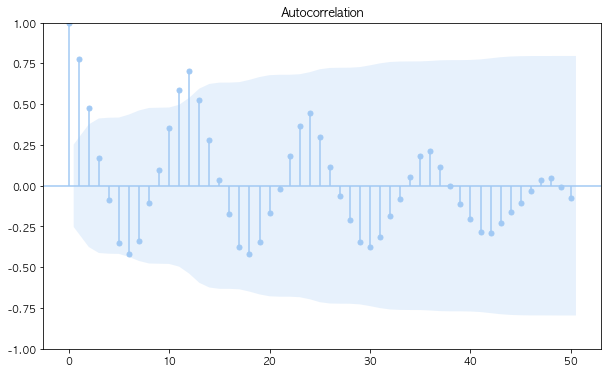

In [323]:
plot_acf(x=arima_data['price'], lags=50)
plt.show()

#### Partial ACF
- 특정 시점(t)의 데이터와 t+n의 데이터 간의 상관계수 파악하되, 그 사이에 있는 시점 데이터의 영향도 제거

In [324]:
from statsmodels.tsa.stattools import pacf

In [325]:
pacf(arima_data['price'], nlags=20)

array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
       -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
        0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
       -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
        0.33253078])

In [326]:
pacf(arima_data['price'], nlags=20, alpha=0.05)

(array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
        -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
         0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
        -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
         0.33253078]),
 array([[ 1.        ,  1.        ],
        [ 0.53587606,  1.04193658],
        [-0.59609098, -0.09003045],
        [-0.47727023,  0.02879029],
        [-0.37628916,  0.12977137],
        [-0.65071369, -0.14465316],
        [ 0.05468275,  0.56074328],
        [-0.11326026,  0.39280027],
        [ 0.10519328,  0.61125381],
        [-0.2743526 ,  0.23170792],
        [ 0.16115338,  0.6672139 ],
        [ 0.21744204,  0.72350257],
        [-0.01929885,  0.48676168],
        [-0.90906088, -0.40300035],
        [-0.84754543, -0.3414849 ],
        [-0.59775453, -0.09169401],
        [ 0.04647237,  0.5525329 ],
        [ 0.32682258,  0.8328831 ],
        [-0.30242398,  0.20363655],
 

In [327]:
from statsmodels.graphics.tsaplots import plot_pacf

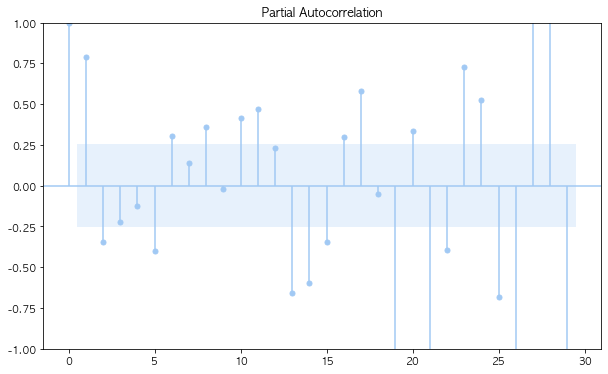

In [328]:
plot_pacf(x=arima_data['price'], lags=29)
plt.show()

### (5) CCA
- Canonical Correlation Analysis (정준상관분석)
- 각 집단의 두 선형 결합에 대한 상관분석. 요인분석과 다변량 회귀분석의 역할을 결합한 분석방법으로 알려져 있음
- 모든 변수들은 원칙적으로 연속형이어야 하지만 범주형 변수일 경우 더미 변수화하여 분석에 사용할 수 있음
- 각각 p, q 개로 이루어진 두 변수 그룹 X와 Y가 있을 때, X와 Y를 소속된 개별 변수들간의 선형결합으로 이루어진 정준변수라 하고, 정준변수 X와 Y 사이의 상관계수 p를 정준상관계수라고 함
- 가능한 모든 선형결합 중 두 변수 X,Y 간 상관계수를 최대화 시키는 선형결합 X,Y를 찾으며 이때, 선형결합을 나타내는 개별 변수들의 계수들을 정준계수라고 함
- 정준변수간 상관계수가 최대일 때는 제1 정준상관계수라고 하고 이에 대응되는 정준변수는 제1 정준변수라 함
- X와 Y의 가능한 모든 선형결합 중에서 제1 정준변수 쌍과는 서로 상관 없으면서 상관계수를 가장 크게 해주는 또 다른 선형결합 X와 Y가 제2 정준변수
- 정준상관분석의 목적은 정준상관계수와 정준변수를 추정하는 것 외에도 정준적재량과 교차적재량을 통해 두 변수 그룹간의 관계에 대한 각 변수의 상대적 영향력을 확인하는 것
    - 정준적재량 (canonical loadings): 정준변수와 해당 정준변수를 구성하는 측정변수들 사이의 상관계수
    - 교차적재량 (cross loadings): 정준변수와 대립하는 정준변수의 측정 변수들 사이의 상관계수
    - 이를 통해 변수 그룹들 사이에 내포된 상대적 중요도의 의미를 파악할 수 있음
- 차원축소 방법으로도 사용

In [329]:
from sklearn.cross_decomposition import CCA

In [330]:
x = cca_data[['Weight', 'Waist', 'Pulse']].values ## 설명 변수 집단: 생리적 변수
y = cca_data[['Chins', 'Situps', 'Jumps']].values ## 종속 변수 집단: 운동량 변수

In [331]:
# 귀무가설: 생리적 변수는 운동량과 연관성이 없다
# 연구가설: 생리적 변수는 운동량과 유의한 상관관계를 가지고 있다.

# 정준변수 구하기
cca = CCA(n_components=1).fit(x, y)
x_c, y_c = cca.transform(x, y)

In [332]:
x_c1 = pd.DataFrame(x_c)[0]
y_c1 = pd.DataFrame(x_c)[0]
print(x_c)
print('\n', y_c)

[[-0.02468003]
 [ 0.28186932]
 [ 0.46275646]
 [ 0.15657182]
 [-0.25055945]
 [ 0.10792552]
 [ 0.15097223]
 [-0.203494  ]
 [-1.2698048 ]
 [-0.23314634]
 [-0.19259852]
 [-0.42858299]
 [ 0.00978148]
 [ 1.77820899]
 [-0.04172843]
 [ 0.00339145]
 [ 0.50445943]
 [-0.54821989]
 [-0.25950936]
 [-0.00361289]]

 [[-0.095968  ]
 [ 0.71700988]
 [ 0.76491769]
 [ 0.03728794]
 [-0.42811337]
 [ 0.54137737]
 [ 0.2989697 ]
 [ 0.11422451]
 [-1.29213118]
 [ 0.1778875 ]
 [-0.39350495]
 [-0.52661561]
 [-0.74610916]
 [ 1.42618716]
 [ 0.72020543]
 [-0.4237238 ]
 [ 0.88430825]
 [-1.05155077]
 [-1.26193648]
 [ 0.53727785]]


In [333]:
# 정준상관계수 구하기
cc_1 = stats.pearsonr(x_c1, y_c1)
print('제1정준상관계수:', cc_1)

# 정준적재량, 교차적재량
print('생리적 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(x_c1.T, x.T)[0, 1:])
print('생리적 정준변수와 운동량 변수들간 교차적재량:', np.corrcoef(x_c1.T, y.T)[0, 1:])
print('운동량 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(y_c1.T, y.T)[0, 1:])
print('운동량 정준변수와 생리적 변수들간 교차적재량:', np.corrcoef(y_c1.T, x.T)[0, 1:])

제1정준상관계수: (1.0, 0.0)
생리적 정준변수와 해당 변수들간 정준적재량: [ 0.62065861  0.92543282 -0.33284891]
생리적 정준변수와 운동량 변수들간 교차적재량: [-0.57890573 -0.65059385 -0.12904413]
운동량 정준변수와 해당 변수들간 정준적재량: [-0.57890573 -0.65059385 -0.12904413]
운동량 정준변수와 생리적 변수들간 교차적재량: [ 0.62065861  0.92543282 -0.33284891]


In [334]:
print(cca.coef_)

[[  2.23882453  29.77930328   4.84091049]
 [ -4.56024769 -60.65727657  -9.86042029]
 [  0.17069351   2.2704476    0.36908297]]


## Distance Metrics
- Clustering의 기준이 되는 지표들
- Numeric
    - 수학적: Euclidian(제곱), Manhattan(절대값), Chebyshev(각 dimension의 Manhattan 거리 중 최대값), Minkowski(n제곱), Canberra(가중 절대값), Cosine(벡터 방향각)
    - 통계적: Standardized(표본분산), Mahalanobis(표본 공분산)
- Categorical
    - Dice (2*교집합/A + B 영역), Jaccard(교집합/합집합 영역), Hamming (같은 위치에서, 서로 다른 원소의 개수)
- Mixed: Gower

In [335]:
from scipy.spatial import distance

### (1) Numeric

In [336]:
a = np.array((1, 2, 3, 4))
b = np.array((1, 1, 1, 3))

In [337]:
### Euclidian
distance.euclidean(a, b)

2.449489742783178

In [338]:
### Manhattan
distance.cityblock(a, b)

4

In [339]:
### Chebyshev
distance.chebyshev(a, b)

2

In [340]:
### Canberra
distance.canberra(a, b)

0.976190476190476

In [341]:
### Minkowski
distance.minkowski(a, b)

2.449489742783178

In [342]:
### Cosine
distance.cosine(a, b)

0.05131670194948623

In [343]:
### Correlation
# 1 - pd.DataFrame([a, b]).T.corr()[1][0]
# 선형 관계 correlation의 역수
distance.correlation(a, b)

0.2254033307585166

In [344]:
### Standardized
iv = [[0.5, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 1]] # inverse of sample variance(diag) matrix
distance.mahalanobis(a, b, iv)

2.0

In [345]:
### Mahalanobis
iv = [[1, 0.5, 0.5, 1], [0.5, 1, 0.5, 1], [0.5, 0.5, 1, 1], [1, 1, 1, 1]] # inverse of cov matrix
distance.mahalanobis(a, b, iv)

3.7416573867739413

### (2) Categorical

In [346]:
a = np.array((1, 0, 1, 1, 1))
b = np.array((1, 0, 0, 0, 1))

In [347]:
### Dice
distance.dice(a, b)

0.3333333333333333

In [348]:
### Jaccard
distance.jaccard(a, b)

0.5

In [349]:
### Hamming
distance.hamming(a, b)

0.4

### (3) Oridinal

In [350]:
a = np.array((1, 2, 3, 4))
b = np.array((1, 3, 4, 8))

In [351]:
### Rank Correlation distance
# Spearman 상관계수의 역수
1 - pd.DataFrame([a, b]).T.corr(method='spearman')[1][0]

0.0

### (4) Mixed
- Gower: 수치형+범주형 모든 변수가 0-1 사이에 오도록 함
    - 수치형은 Manhattan, 범주형은 다르면 1, 같으면 0

In [352]:
# !pip install gower
import gower

In [353]:
x = defaults[['dti', 'payment_inc_ratio', 'home_', 'purpose_']].loc[0:4, :]

In [354]:
gower.gower_matrix(x)

array([[0.        , 0.62204784, 0.6863877 , 0.632904  , 0.37727892],
       [0.62204784, 0.        , 0.8143398 , 0.7608561 , 0.5389727 ],
       [0.6863877 , 0.8143398 , 0.        , 0.43070832, 0.30910876],
       [0.632904  , 0.7608561 , 0.43070832, 0.        , 0.505625  ],
       [0.37727892, 0.5389727 , 0.30910876, 0.505625  , 0.        ]],
      dtype=float32)

## Clustering: Hierarchical
- 개체(군집) 간 거리(유사성) 기반 분석

### (1) Agglomerative Clustering
- 연결법
    - 최단, 최장, 평균: 지역적 최적화
    - 중심, 와드: 군집의 크기에 가중을 둘 수 있음
- methods: single, complete, average, weighted, centroid, median, ward

In [355]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [356]:
usarrests.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [ ]:
label_list = usarrests.index

#### Single Linkage Method
- 최단연결법
- 군집 별 관측치 거리의 최소값으로 거리 측정
- 군집의 객체 수가 비슷하지 않을 수 있음

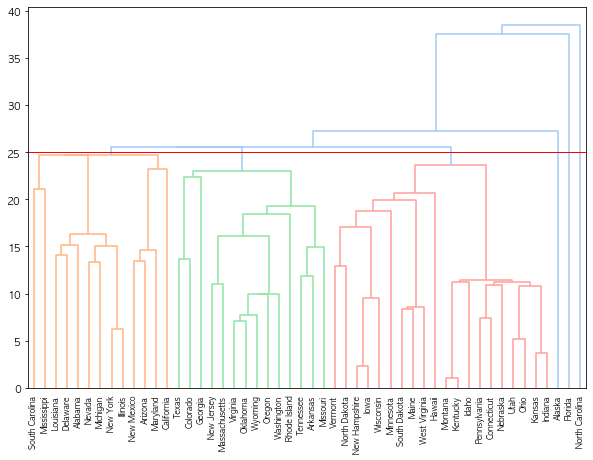

In [358]:
single = linkage(usarrests.iloc[:, 1::], metric='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            color_threshold=25,# 군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

#### Ward Linkage Method
- 최단연결법의 단점 보완. 군집 내 오차(SSE)에 기반한 거리 측정
- 상대적으로 계산량이 많으나, 해석력이 높음

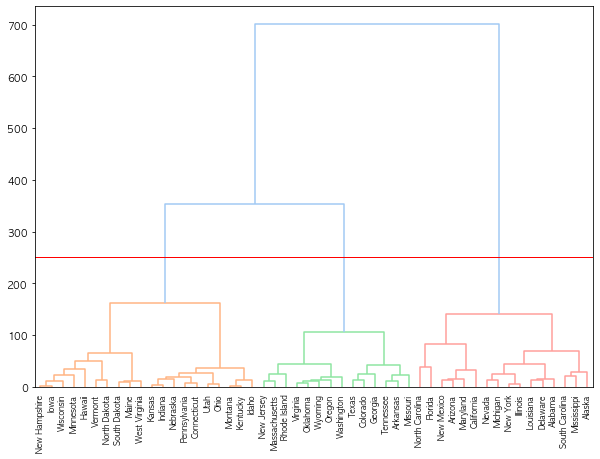

In [359]:
ward = linkage(usarrests.iloc[:, 1::], metric='euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [360]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [361]:
usarrests['cluster'] = assignments
usarrests.groupby('cluster').mean()

Murder     Assault   UrbanPop       Rape
cluster                                             
1        11.812500  272.562500  68.312500  28.375000
2         8.214286  173.285714  70.642857  22.842857
3         4.270000   87.550000  59.750000  14.390000

#### Complete Linkage Method
- Scikit-learn 사용했으나, Scipy 사용도 위와 마찬가지로 가능

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
import numpy as np

In [7]:
### Agglomerative with Scikit-learn
x = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(x)

In [8]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [11]:
agg.labels_

array([1, 1, 0, 0])

In [9]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

#### Average Linkage Method & Gower distance

In [ ]:
import gower

In [368]:
x = defaults[['dti', 'payment_inc_ratio', 'home_', 'purpose_']].loc[0:4, :]
x

dti  payment_inc_ratio home_            purpose_
0   1.00            2.39320  RENT      major_purchase
1   5.55            4.57170   OWN      small_business
2  18.08            9.71600  RENT               other
3  10.08           12.21520  RENT  debt_consolidation
4   7.06            3.90888  RENT               other

In [369]:
dist_matrix = gower.gower_matrix(x)
model_average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed')
clusters_average = model_average.fit_predict(dist_matrix)
clusters_average

array([0, 1, 0, 0, 0])

### (2) HDBSCAN
- Hierachical DBSCAN
- 계층적 구조 및 Local density에 대한 정보 반영
- HDBDCAN Steps
    - Transform the space according to the density/sparsity.
    - Build the minimum spanning tree of the distance weighted graph.
    - Construct a cluster hierarchy of connected components.
    - Condense the cluster hierarchy based on minimum cluster size.
    - Extract the stable clusters from the condensed tree.

In [12]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

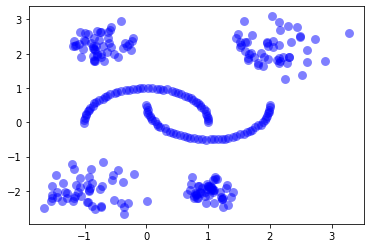

In [15]:
num=100
moons, _ = make_moons(n_samples=num, noise=0.01)
blobs, _ = make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', alpha=0.5, s=80, linewidths=0)
plt.show()

In [16]:
# !pip install hdbscan
import hdbscan

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True) # min_size는 없을 경우 min_cluster_size로 자동 생성
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

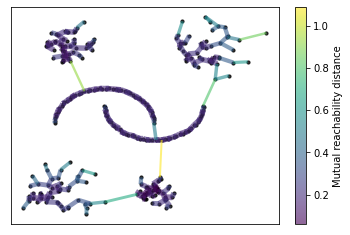

In [25]:
# Cluster hierachy tree 
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=10, edge_linewidth=2)
plt.show()

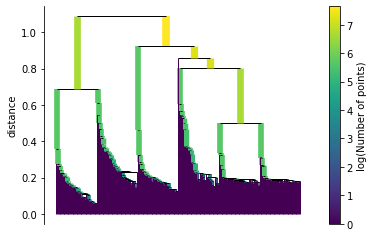

In [26]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True) # dendrogram
plt.show()

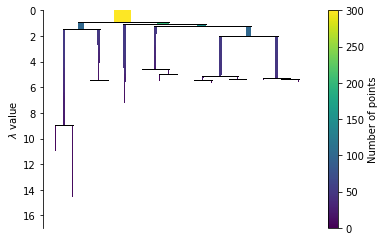

In [27]:
# 일정 distance 미만의 데이터(minimum size 미만의 클러스터)를 noise로 처리
clusterer.condensed_tree_.plot()
plt.show()

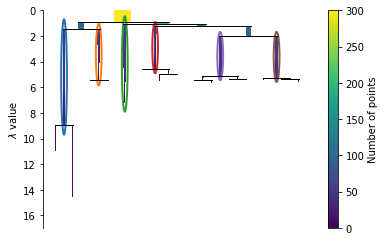

In [28]:
# 안정적인 클러스터 추출 (오래 살아남은 클러스터)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

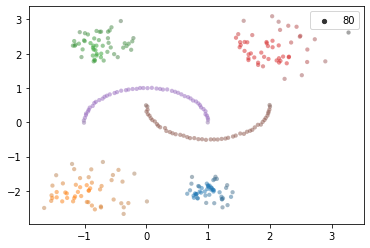

In [50]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) if col >= 0 else (0.3, 0.3, 0.3) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
sns.scatterplot(x=test_data.T[0], y=test_data.T[1], c=cluster_colors, alpha=0.5, size=80, linewidth=0)
plt.show()

## Clustering: Non-hierarchical

### (1) K-Means
- 군집 개수만큼 초기값을 지정하고 초기 군집을 형성한 후, 평균을 재계산하여 값 갱신
- 초기 센트로이드는 K-means++ 알고리즘이 기본값 (random보다 좋음)
- Scaling 필요
- 이상치 영향을 많이 받을 수 있고, 볼록한 군집 형태가 아니면 성능이 떨어짐
- 변수가 많은 경우 정확도가 떨어짐 (PCA 고려)
- 군집 방법
    - Hard: 각 샘플에 대해 가장 가까운 클러스터 선택
    - Soft: 클러스터마다 샘플에 점수 부여하고, 중심과의 유클리드 거리 계산
- Inertia
    - 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
    - 랜덤 초기화를 하여 여러 번 알고리즘을 실행한 다음, 이너셔가 낮은 모델을 선택하게 됨

In [418]:
x = iris.drop('Class', axis=1)
x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [419]:
### elbow plot
def elbow(x):
    sse=[]
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
    print(sse)

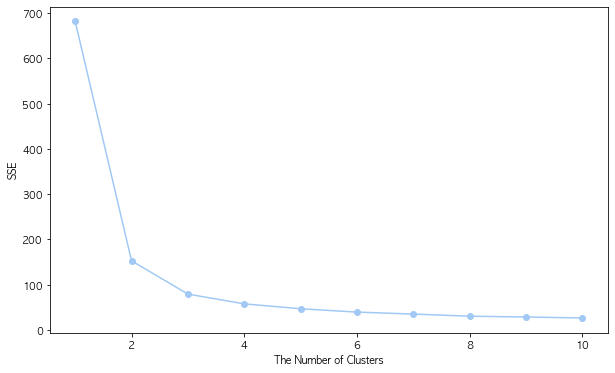

[681.3706, 152.34795176035792, 78.85144142614601, 57.256009315718146, 46.44618205128205, 39.066035353535355, 34.723277629233515, 29.99042640692641, 28.278674715635248, 26.094089542638308]


In [420]:
elbow(x)

In [421]:
from sklearn.metrics import calinski_harabasz_score

In [422]:
# 클러스터별 콜린스키 하라바츠 결과 비교
# 가장 높은 값 선택
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(x, labels))

513.9245459802768
561.62775662962
530.4871420421675
495.54148767768777
473.5154538824768
443.84523107907245
440.59767319067873
407.0468400265113


In [423]:
# 최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.drop('Class', axis=1).groupby(['cluster']).mean()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.901613          2.748387           4.393548   
1                 5.006000          3.428000           1.462000   
2                 6.850000          3.073684           5.742105   

         petal width (cm)  
cluster                    
0                1.433871  
1                0.246000  
2                2.071053

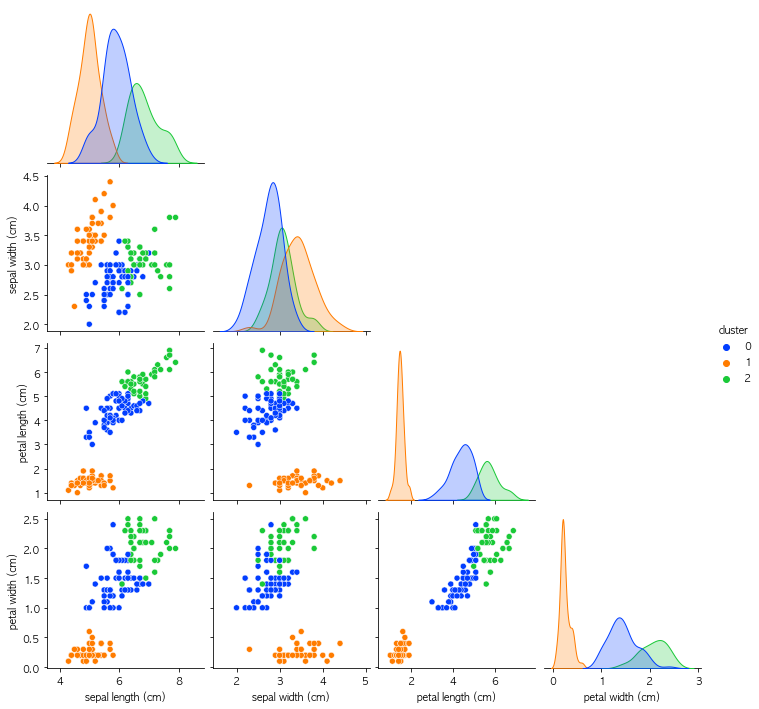

In [424]:
# k-means 시각화 
# 군집결과 시각화
sns.pairplot(iris, diag_kind='kde', hue="cluster", corner=True, palette='bright')
plt.show()


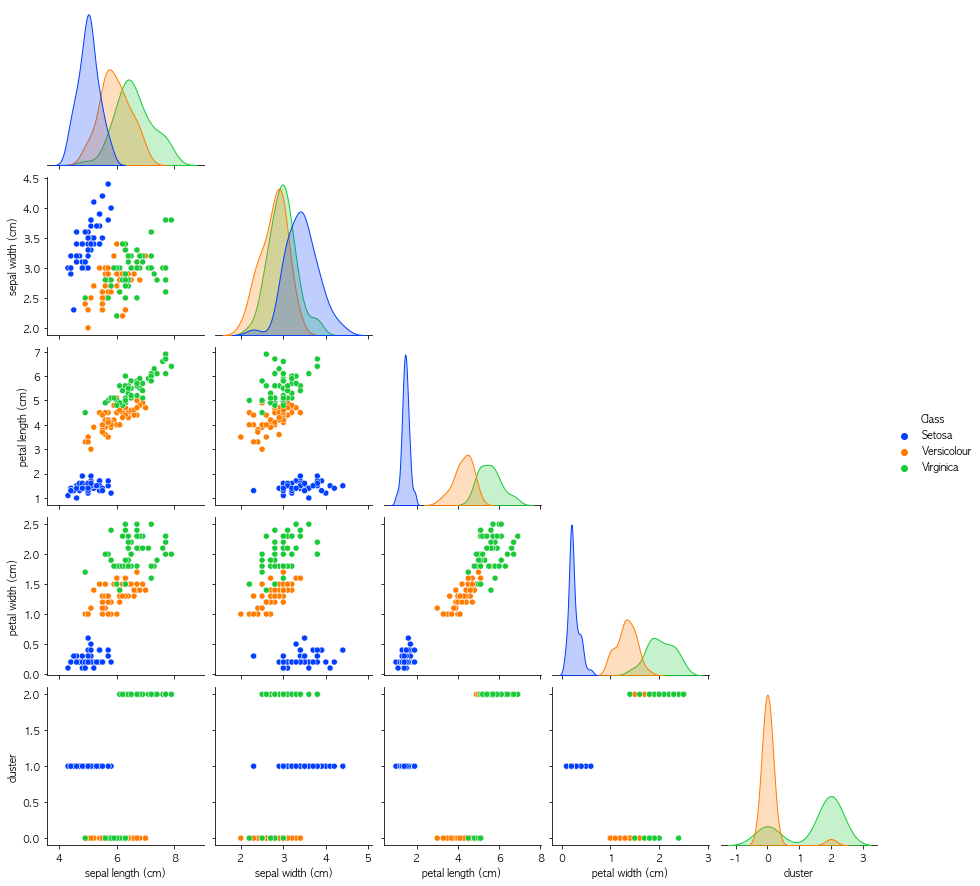

In [425]:
### 원본 class와 비교
sns.pairplot(iris, diag_kind='kde', hue="Class", corner=True, palette='bright')
plt.show()

In [379]:
x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(x.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [380]:
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y
cluster.head(3)

ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0

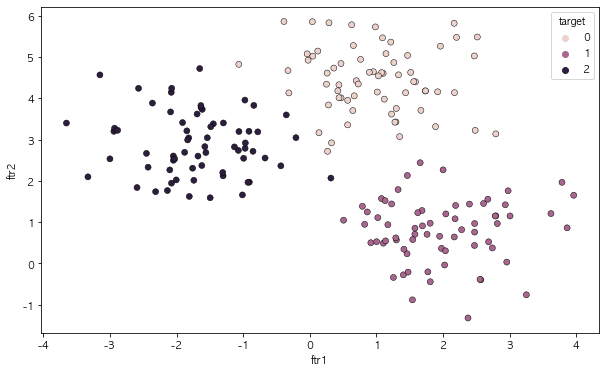

In [381]:
sns.scatterplot(x=cluster['ftr1'], y=cluster['ftr2'], edgecolor='black', hue=cluster['target'])
plt.show()

In [382]:
from sklearn.cluster import KMeans

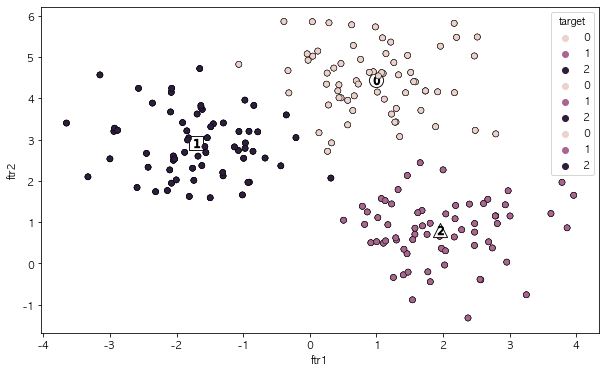

In [383]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(x)
cluster['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cluster[cluster['kmeans_label']==label]
    center_x_y = centers[label]
    sns.scatterplot(x=cluster['ftr1'], y=cluster['ftr2'], edgecolor='black', hue=cluster['target'])
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [384]:
print(cluster.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [385]:
### another blobs
blob_centers = np.array([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

x, y = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=7)

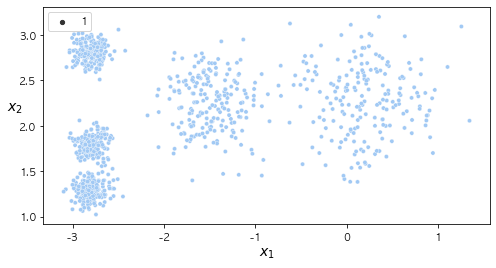

In [386]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x[:, 0], y=x[:, 1], size=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

In [387]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)

# cluster 중심
kmeans.cluster_centers_[:20]

array([[-2.80248802,  2.8023078 ],
       [ 0.20088156,  2.2751718 ],
       [-2.80906999,  1.29323645],
       [-1.47273449,  2.25383102],
       [-2.77986689,  1.79516229]])

In [388]:
# labels
kmeans.labels_[:20]

array([0, 1, 1, 2, 0, 4, 1, 1, 1, 0, 1, 3, 4, 3, 4, 4, 3, 1, 1, 2],
      dtype=int32)

In [389]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(x_new)

array([1, 1, 0, 0], dtype=int32)

In [390]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), inewidths=1, colors='k')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], color='black', size=2)
    
    if show_centroids:
        centroids = clusterer.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color='w', zorder=10, alpha=0.9)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

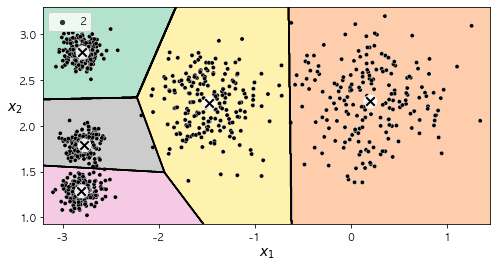

In [391]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x)
plt.show()

In [392]:
kmeans.transform(x_new)

array([[2.91507065, 0.34069476, 2.8966168 , 1.49444875, 2.78740353],
       [5.85769281, 2.81261152, 5.85190643, 4.47993125, 5.78349546],
       [0.27945159, 3.28192302, 1.7174097 , 1.69979648, 1.22478264],
       [0.36111077, 3.20876775, 1.22177434, 1.54697741, 0.7384137 ]])

In [393]:
# inertia
kmeans.inertia_

104.89322309085537

In [394]:
# score는 음수 출력 (클 수록 좋은 것 규칙)
kmeans.score(x)

-104.89322309085537

In [395]:
# n_init 지정 가능 (default 10)
kmeans_rnd_10_inits = KMeans(n_clusters=5, n_init=10, init="random", algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(x)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

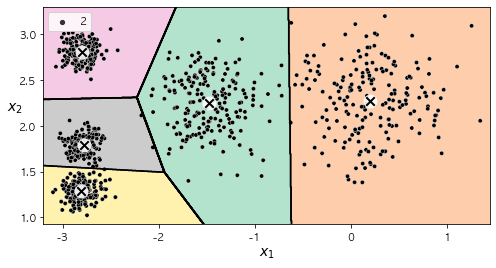

In [396]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, x)
plt.show()

In [397]:
### elkan 알고리즘 (default) 은 더 빠르지만, 희소 행렬은 지원하지 않음
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(x)

72.8 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [398]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(x)

52.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


#### Cohesion, Separation
- Cohesion(응집도): 클러스터 내의 모든 거리 가중치의 합. 클러스터 내의 객체들이 밀집해있는 정도를 측정함(=SSE, inertia)
- Separation(분리도): 클러스터 외부 객체 간의 모든 거리 가중치의 합으로, 클러스터 간 잘 분리되어 있는 정도를 측정함. 각 클러스터의 중심점과의 pairwise 거리 최소값으로 측정

In [408]:
from sklearn.metrics import pairwise_distances_argmin_min

In [409]:
d = pairwise_distances_argmin_min(kmeans.cluster_centers_, x)[1]

print(f'군집결과의 응집도는 {round(kmeans.inertia_, 3)}, 분리도는 {round(sum(d) / len(d), 3)}')

군집결과의 응집도는 104.893, 분리도는 0.014


#### Best K
- Calinski_harabasz: 높을수록 성능이 좋음
- Elbow: SSE가 급격하게 줄거나, 기울기가 소실되는 구간 판단
- Silhouette score, silhouette plot: 샘플 개수 실루엣 계수 종합적으로 판단
    - 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 판단
    - (b-a)/max(a, b). a는 클러스터 내 다른 샘플까지의 평균 거리, b는 가장 가까운 클러스터까지 평균 거리

In [410]:
### elbow plot
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

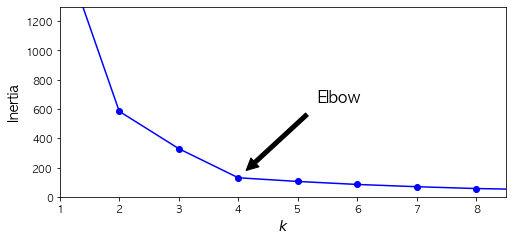

In [411]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction', 
             fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

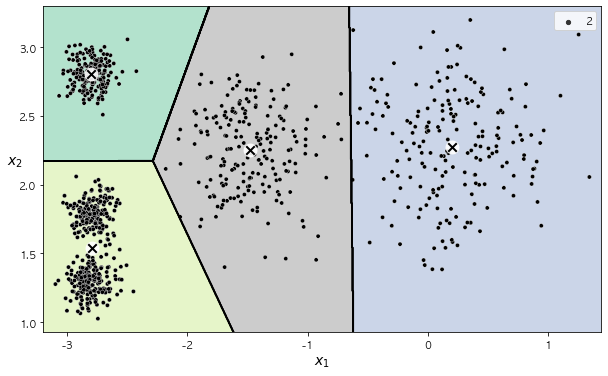

In [412]:
plot_decision_boundaries(kmeans_per_k[4-1], x)
plt.show()

In [413]:
from sklearn.metrics import silhouette_score

In [414]:
### silhouette score
# 전체 평균이 1에 가까울수록 좋음
# 군집의 스코어 편차가 작은 것이 좋음
silhouette_score(x, kmeans.labels_)

0.6591912689661514

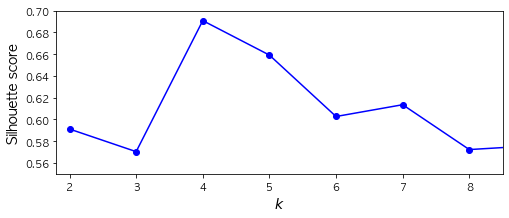

In [415]:
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [416]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

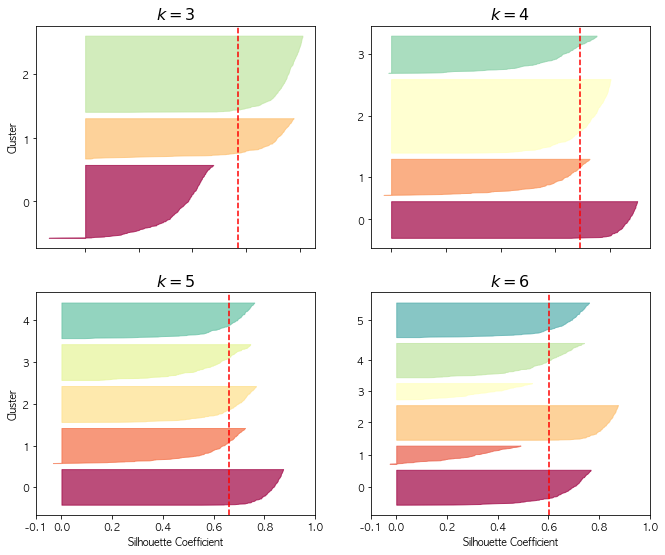

In [417]:
### silhouette diagram
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x, y_pred)

    padding = len(x) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [426]:
iris_result = iris.groupby(['Class', 'cluster'])['sepal length (cm)'].count()
print(iris_result)

Class        cluster
Setosa       1          50
Versicolour  0          48
             2           2
Virginica    0          14
             2          36
Name: sepal length (cm), dtype: int64


In [427]:
from sklearn.decomposition import PCA

In [428]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(x)

iris['pca_x'] = pca_transformed[:,0]
iris['pca_y'] = pca_transformed[:,1]
iris.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

    Class  cluster     pca_x     pca_y  
0  Setosa        1 -2.684126  0.319397  
1  Setosa        1 -2.714142 -0.177001  
2  Setosa        1 -2.888991 -0.144949

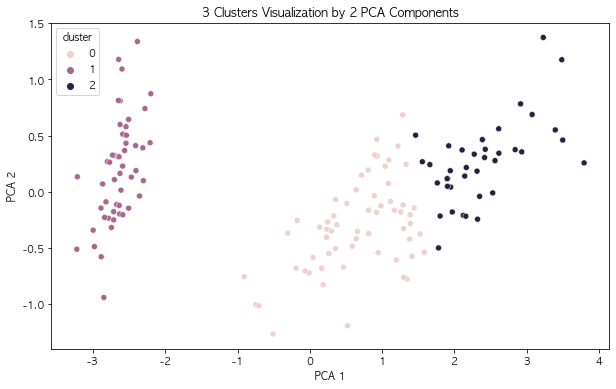

In [429]:
sns.scatterplot(x=iris['pca_x'], y=iris['pca_y'], hue=iris.cluster)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [430]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(x.iloc[:, :4], iris['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
iris['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(x.iloc[:, :4], iris['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


In [431]:
iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [432]:
import matplotlib.cm as cm

In [433]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

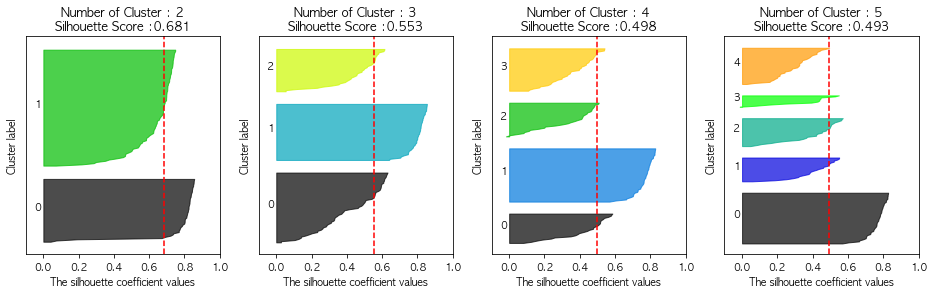

In [434]:
visualize_silhouette([2, 3, 4, 5], x.iloc[:, :4])

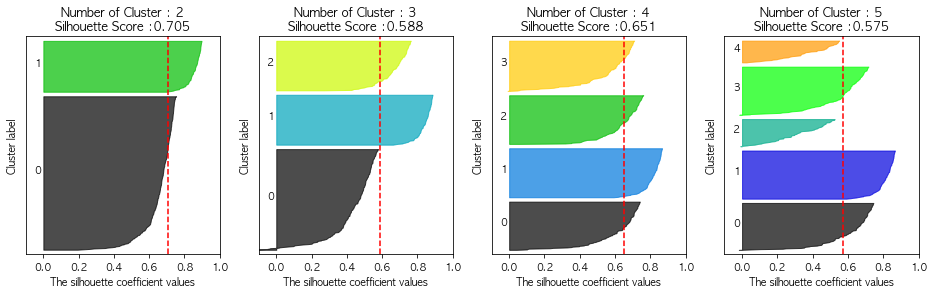

In [435]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], x)

In [436]:
# wine data
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    Class  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [437]:
wine['Class'] = np.where(wine['Class']=='class_0', 0, np.where(wine['Class']=='class_1', 1, 2))

In [438]:
x = wine.drop('Class', axis=1)
y = wine['Class']

In [439]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled, columns=[x.columns])

In [440]:
# 클러스터별 콜린스키 하라바츠 결과 비교
# 가장 높은 값 선택
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(scaled)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(scaled, labels))

69.25508094364052
70.74301842860513
55.34262963272185
46.891949650326964
41.53465326257077
37.4145500510151
34.33092074746437
32.75036225847007


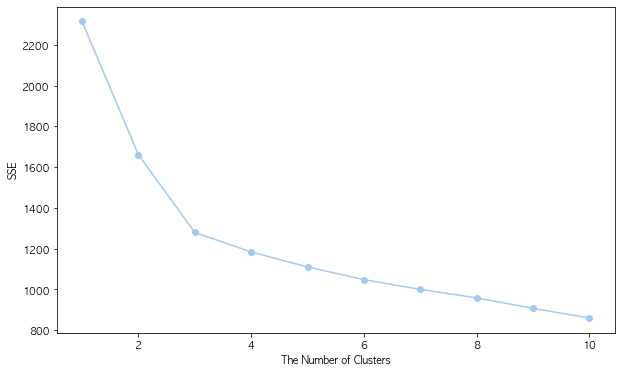

[2314.0, 1660.5731405564195, 1279.5193242054538, 1184.1264000570986, 1110.2544418911068, 1048.290820855525, 1000.5226455912729, 958.723454960076, 907.3396066550768, 860.1938374610759]


In [441]:
elbow(scaled)

In [442]:
# 최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

# 할당된 군집을 데이터에 추가
new_labels = km.labels_
wine['cluster'] = new_labels

wine.groupby(['cluster']).mean()

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        13.804468    1.883404  2.426170          17.023404  105.510638   
1        12.516667    2.494203  2.288551          20.823188   92.347826   
2        12.929839    2.504032  2.408065          19.890323  103.596774   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.867234    3.014255              0.285319         1.910426   
1             2.070725    1.758406              0.390145         1.451884   
2             2.111129    1.584032              0.388387         1.503387   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
cluster                                                                         
0               5.702553  1.078298                      3.114043  1195.148936   
1               4.001575  0.941159                      2.490725   458.231884   
2               5.316388  0.883968                      2.365484   728.338710   

            Class  
cluster            
0        0.021277  
1        1.275362  
2        1.258065

In [443]:
from sklearn.metrics import confusion_matrix

In [444]:
confusion_matrix(y, wine['cluster'])

array([[46,  0, 13],
       [ 1, 50, 20],
       [ 0, 19, 29]])

In [445]:
d = pairwise_distances_argmin_min(km.cluster_centers_, scaled_df)[1]

print(f'군집결과의 응집도는 {round(km.inertia_, 3)}, 분리도는 {round(sum(d) / len(d), 3)}')

군집결과의 응집도는 2370523.009, 분리도는 798.379


#### Minibatch K-means

In [399]:
from sklearn.cluster import MiniBatchKMeans

In [400]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [401]:
minibatch_kmeans.inertia_

104.90898558895428

In [402]:
### mnist data
x_train, x_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [403]:
# memmap 사용
filename = "my_mnist.data"
x_mm = np.memmap(filename, dtype='float32', mode='write', shape=x_train.shape)
x_mm[:] = x_train

In [404]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(x_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [405]:
# batch load
def load_next_batch(batch_size):
    return x[np.random.choice(len(x), batch_size, replace=False)]

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None
np.random.seed(42)
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    x_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(x_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        x_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(x_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        
best_kmeans.score(x)

-104.91647497929381

In [406]:
# 시간 비교
times = np.empty((20, 2))
inertias = np.empty((20, 2))
for k in range(1, 21):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 20), end="")
    times[k-1, 0] = timeit("kmeans_.fit(x)", number=3, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(x)", number=3, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

20/20

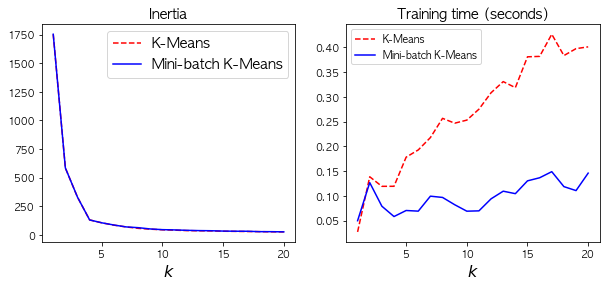

In [407]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.lineplot(x=range(1, 21), y=inertias[:, 0], color="red", linestyle="dashed", label="K-Means")
sns.lineplot(x=range(1, 21), y=inertias[:, 1], color="blue", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
sns.lineplot(x=range(1, 21), y=times[:, 0], color="red", linestyle="dashed", label="K-Means")
sns.lineplot(x=range(1, 21), y=times[:, 1], color="blue", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.show()

#### Applications of K-means
- Preprocessing
- Semi-supervised learning

##### Preprocessing

In [447]:
from sklearn.linear_model import LogisticRegression

In [448]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [449]:
log_reg_score = log_reg.score(x_test, y_test) # 기본 모델 정확도
log_reg_score

0.9688888888888889

In [450]:
from sklearn.pipeline import Pipeline

In [451]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50, random_state=42)), # K-means 추가
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [452]:
pipeline_score = pipeline.score(x_test, y_test)
pipeline_score

0.9777777777777777

In [453]:
from sklearn.model_selection import GridSearchCV

In [454]:
### 최적의 K 찾기
param_grid = dict(kmeans__n_clusters=range(85, 95))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............................kmeans__n_clusters=85; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=85; total time=   6.1s
[CV] END ..............................kmeans__n_clusters=85; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=86; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=87; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=87; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=87; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=88; total time=   5.6s
[CV] END ..............................kmeans__n_clusters=88; total time=   5.7s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(85, 95)}, verbose=2)

In [455]:
grid_clf.best_params_

{'kmeans__n_clusters': 86}

In [456]:
grid_clf.score(x_test, y_test)

0.9822222222222222

##### Semi-supervised Learning

In [457]:
# base model
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])
log_reg.score(x_test, y_test)

0.8333333333333334

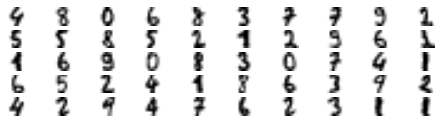

In [458]:
# 대표 이미지 labeling 후 학습
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, x_representative_digit in enumerate(x_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(x_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [459]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [460]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [461]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_representative_digits, y_representative_digits)
log_reg.score(x_test, y_test)

0.09555555555555556

In [462]:
# label 전체 전파
y_train_propagated = np.empty(len(x_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [463]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [464]:
log_reg.score(x_test, y_test)

0.15333333333333332

In [465]:
# 센트로이드 근처 75%에 label 전파
percentile_closest = 75

x_cluster_dist = x_digits_dist[np.arange(len(x_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_==i)
    cluster_dist = x_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (x_cluster_dist > cutoff_distance)
    x_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (x_cluster_dist!=-1)
x_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [466]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [467]:
log_reg.score(x_test, y_test)

0.15777777777777777

In [468]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.19541375872382852

### (3) K-medoids
- 평균 대신 중앙값 사용

In [486]:
x = iris.drop(['Class', 'cluster'], axis=1)

In [487]:
# !pip install scikit-learn-extra
# 제공되지 않는 패키지
from sklearn_extra.cluster import KMedoids

In [488]:
kme = KMedoids(n_clusters=3, metric='euclidean', random_state=1)
kme.fit(x)

# 할당된 군집을 iris 데이터에 추가
new_labels = kme.labels_
iris['cluster_kme'] = new_labels

iris.tail(10) # 군집이 조금 다르게 이루어졌음

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
140                6.7               3.1                5.6               2.4   
141                6.9               3.1                5.1               2.3   
142                5.8               2.7                5.1               1.9   
143                6.8               3.2                5.9               2.3   
144                6.7               3.3                5.7               2.5   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         Class  cluster     pca_x     pca_y  silhouette_coeff  cluster_kme  
140  Virginica        2  2.314155  0.183651          0.570234            2  
141  Virginica        2  1.922268  0.409203          0.410255            2  
142  Virginica        0  1.415236 -0.574916          0.232253            0  
143  Virginica        2  2.563013  0.277863          0.613247            2  
144  Virginica        2  2.418746  0.304798          0.567078            2  
145  Virginica        2  1.944110  0.187532          0.425136            2  
146  Virginica        0  1.527167 -0.375317          0.104171            2  
147  Virginica        2  1.764346  0.078859          0.314930            2  
148  Virginica        2  1.900942  0.116628          0.352454            2  
149  Virginica        0  1.390189 -0.282661          0.185442            0

### (4) Mean Shift
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
- 데이터의 분포를 이용하여 군집 중심을 찾음
- KDE (Kernel Density Estimation) 이용
    - 적절한 KDE bandwidth(h) 제공이 중요
    - 작을수록 좁고 뾰족한 KDE이며, overfitting 확률이 높음

In [489]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [490]:
x, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [ 0  1  2  3  4  5  6  7  8  9 10]


In [491]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3]


In [492]:
bandwidth = estimate_bandwidth(x)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.754


In [493]:
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(x)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


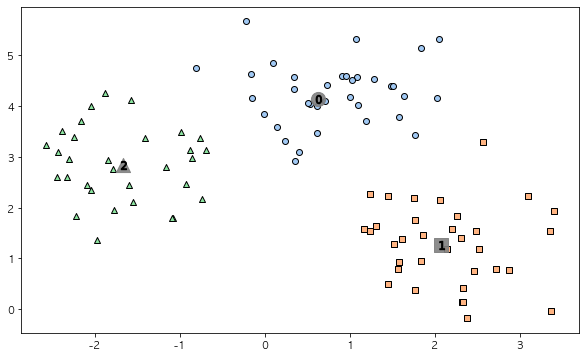

In [494]:
cluster['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = cluster[cluster['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [495]:
print(cluster.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  33
        1                   1
1       1                  33
2       2                  31
        0                   2
Name: meanshift_label, dtype: int64


### (5) Mixture distribution
- 분포 기반 군집분석. 어느 모형(분포)에서 나왔을 확률이 높은지를 계산하며, 통계적으로 엄밀한 결과를 얻을 수 있음
- 일반적으로 타원형 클러스터를 가정
- 주로 정규분포를 가정하나, 다른 분포여도 상관없음
- 군집의 크기가 너무 작거나, 가정한 분포와 실제 데이터의 차이가 크면 성능이 떨어짐
- 이상치 처리, scaling 필요
- EM(Expectation-Maximization) Algorithm
    - 초기값 설정
    - 잠재변수 Z의 기대치 계산 (X가 특정 군집에 속할 확률)
    - 기대치를 이용해 파라미터 추정 (계산된 확률로 모수 추정)
    - 반복 정지. Likelihood가 최대가 될 때 수렴함

In [496]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [497]:
df = iris.drop(['pca_x', 'pca_y', 'silhouette_coeff'], axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Class', axis=1))

In [498]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [499]:
df['gmm_cluster'] = gmm_labels

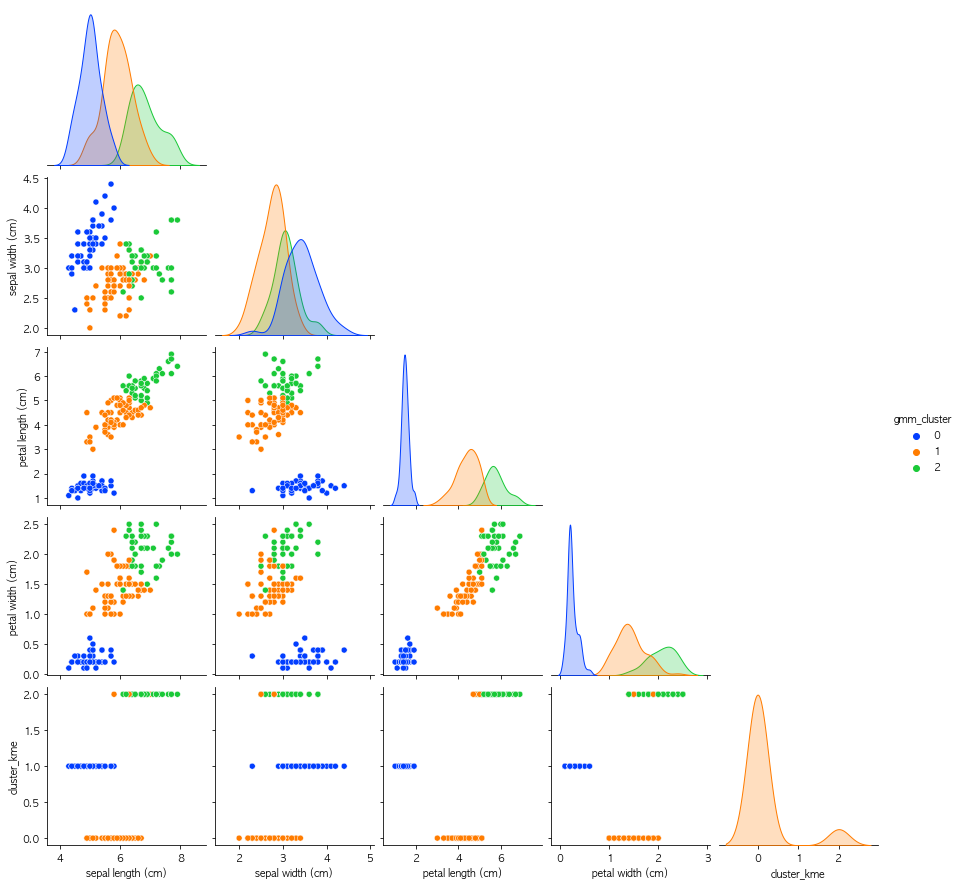

In [500]:
# 군집결과 시각화
sns.pairplot(df.drop('cluster', axis=1), diag_kind='kde', hue="gmm_cluster", corner=True, palette='bright')
plt.show()

In [501]:
# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = df.groupby(['Class'])['gmm_cluster'].value_counts()
print(iris_result)

Class        gmm_cluster
Setosa       0              50
Versicolour  1              48
             2               2
Virginica    2              36
             1              14
Name: gmm_cluster, dtype: int64


In [502]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, is_center=True):
    if is_center:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    is_noise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            is_noise = True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if is_center:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    if is_noise:
        legend_loc = 'upper center'
    else: legend_loc = 'upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

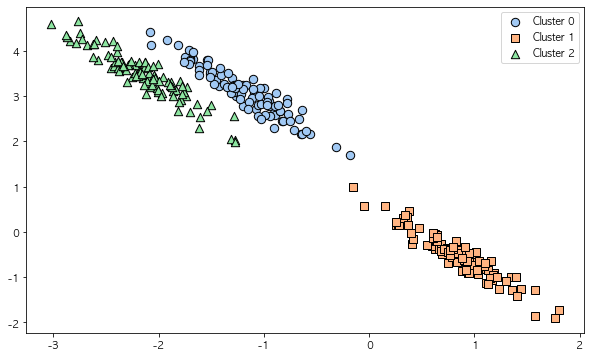

In [503]:
### 길게 늘어난 타원형의 데이터 셋 -> KMeans는 잘 클러스터링 하지 못하는 데이터
# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 변환 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_aniso = np.dot(x, transformation)
# feature 데이터 셋과 make_blobs(x) 의 y 결과 값을 DataFrame으로 저장
cluster = pd.DataFrame(data=x_aniso, columns=['ftr1', 'ftr2'])
cluster['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, cluster, 'target', is_center=False)

In [504]:
# 3개의 n_components기반 GMM을 x_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
cluster['gmm_label'] = gmm_label

print('\n### Gaussian Mixture Clustering ###')
print(cluster.groupby('target')['gmm_label'].value_counts())


### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


In [505]:
# faithful data
faithful.head()

eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85

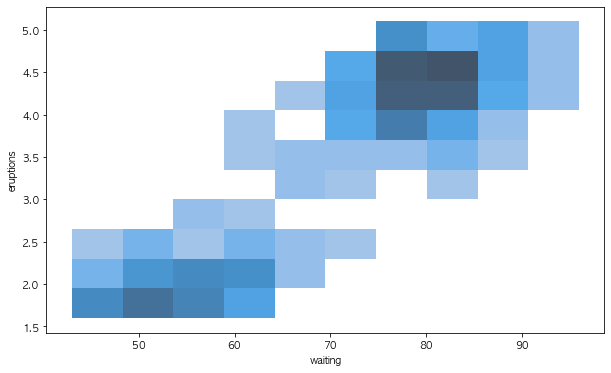

In [506]:
sns.histplot(x='waiting', y='eruptions', data=faithful)
plt.show()

In [507]:
scaler = StandardScaler()
faithful_scaled = scaler.fit_transform(faithful)

gmm = GaussianMixture(n_components=2)
gmm.fit(faithful_scaled)
gmm_labels = gmm.predict(faithful_scaled)
gmm_labels

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

In [508]:
faithful['gmm_cluster'] = gmm_labels

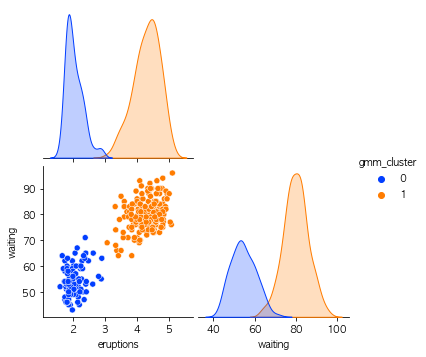

In [509]:
# 군집결과 시각화
sns.pairplot(faithful, diag_kind='kde', hue="gmm_cluster", corner=True, palette='bright')
plt.show()

In [510]:
### mixed blobs
x1, y1 = make_blobs(n_samples=100, centers=((4, -4), (0, 0)), random_state=42)
x1 = x1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

x2, y2 = make_blobs(n_samples=25, centers=1, random_state=42)
x2 = x2 + [6, -8]
x = np.r_[x1, x2] # array 붙이기
y = np.r_[y1, y2]

In [511]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [512]:
gm.weights_

array([0.2368444 , 0.39932141, 0.3638342 ])

In [513]:
gm.means_

array([[ 3.03543564,  0.86914847],
       [-1.53583314,  1.23734961],
       [-0.08868617, -0.16945711]])

In [514]:
gm.covariances_

array([[[ 1.0146403 , -0.23275168],
        [-0.23275168,  0.96153326]],

       [[ 0.62196185,  0.68773089],
        [ 0.68773089,  0.98949207]],

       [[ 0.45077719,  0.52738099],
        [ 0.52738099,  0.87891856]]])

In [515]:
# EM 수렴 여부
gm.converged_

True

In [516]:
# 반복 횟수
gm.n_iter_

4

In [517]:
# predict
gm.predict(x)
# gm.predict_proba(x)

array([2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [518]:
### 생성 모델의 특징
# 군집으로부터 샘플 생성
x_new, y_new = gm.sample(6)
print(x_new, y_new)

[[ 3.38161146  2.33254389]
 [-1.30325812  1.42244585]
 [-1.26539824 -1.49204408]
 [ 0.06338836  0.35687283]
 [ 0.31833122  0.17710092]
 [ 0.25208798 -0.72294966]] [0 1 2 2 2 2]


In [519]:
# PDF 추정
# 점수가 높을수록 밀도가 높음
gm.score_samples(x)

array([-2.03258751, -2.17086215, -3.83024553, -1.87464553, -2.65439074,
       -3.21340998, -1.88825542, -2.00479653, -3.70013238, -3.11569122,
       -1.8017335 , -2.46077275, -2.04730229, -2.14713553, -2.1567461 ,
       -2.75969012, -2.26919459, -3.29028438, -2.62688669, -1.92347127,
       -1.8871611 , -3.82034126, -2.65725966, -2.4852267 , -4.07835149,
       -2.07976823, -2.38125921, -2.79043898, -2.39074995, -3.29481999,
       -2.4716914 , -2.3641291 , -2.39344197, -2.5885198 , -3.25335674,
       -6.85948201, -1.99255213, -3.78256394, -3.11896251, -1.89247477,
       -2.20354285, -3.77759371, -2.15082132, -2.4956231 , -2.39714258,
       -3.23364606, -2.68880912, -4.24574108, -2.1881714 , -2.07733633,
       -2.8192741 , -2.6580395 , -4.35754584, -2.86530234, -3.19491375,
       -3.76411993, -4.31886138, -2.17667128, -1.93630751, -2.48742732,
       -2.23448788, -1.96927835, -3.87220062, -2.77161749, -2.11707028,
       -1.80923132, -4.47427538, -3.17801656, -1.86551829, -3.29

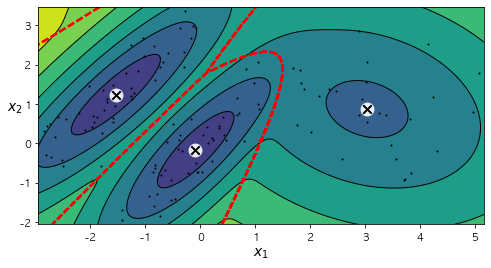

In [520]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    centroids = clusterer.means_[clusterer.weights_ > clusterer.weights_.max() / 10]
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, x)
plt.show()

##### Covariance types
- full(기본값): 제약이 없습니다. 모든 클러스터가 어떤 크기의 타원도 될 수 있습니다.
- tied: 모든 클러스터가 동일하지만 어떤 타원도 가능합니다(즉, 공분산 행렬을 공유합니다).
- spherical": 모든 클러스터가 원형이지만 지름은 다를 수 있습니다(즉, 분산이 다릅니다).
- diag": 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 합니다(즉, 공분산 행렬이 대각 행렬입니다).

In [521]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

gm_full.fit(x)
gm_tied.fit(x)
gm_spherical.fit(x)
gm_diag.fit(x)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

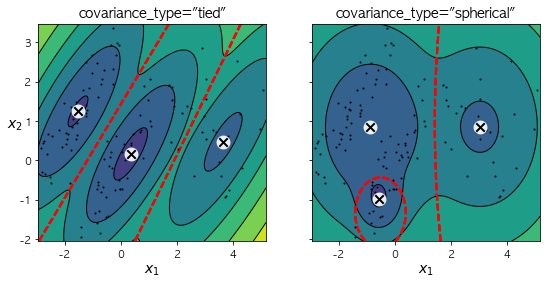

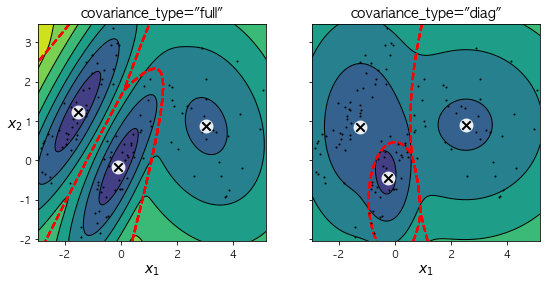

In [522]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_gaussian_mixture(gm_tied, x)
plt.title('covariance_type="{}"'.format(gm_tied.covariance_type), fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(gm_spherical, x, show_ylabels=False)
plt.title('covariance_type="{}"'.format(gm_spherical.covariance_type), fontsize=14)
plt.show()

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_gaussian_mixture(gm_full, x)
plt.title('covariance_type="{}"'.format(gm_full.covariance_type), fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(gm_diag, x, show_ylabels=False)
plt.title('covariance_type="{}"'.format(gm_diag.covariance_type), fontsize=14)
plt.show()

##### Outlier detection with Gaussian Mixture
- 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있음
- 사용할 밀도 임곗값을 결정해야 함

In [523]:
densities = gm.score_samples(x)
density_threshold = np.percentile(densities, 4) # 밀도 임계값 정의
anomalies = x[densities < density_threshold]

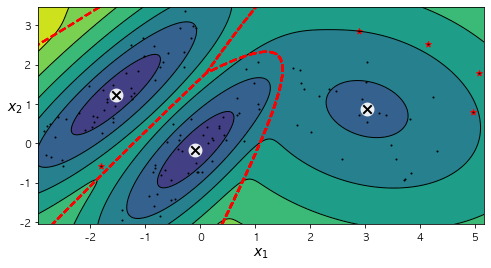

In [524]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, x)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()

##### Best K
- BIC, AIC 등 이론적 정보 기준 사용
- 과한 클러스터를 제한하고, 데이터의 잘 맞는 모델을 찾음

In [525]:
gm.bic(x)

853.0276656489054

In [526]:
gm.aic(x)

804.9463321147663

In [527]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(x) for k in range(1, 11)]

In [528]:
bics = [model.bic(x) for model in gms_per_k]
aics = [model.aic(x) for model in gms_per_k]

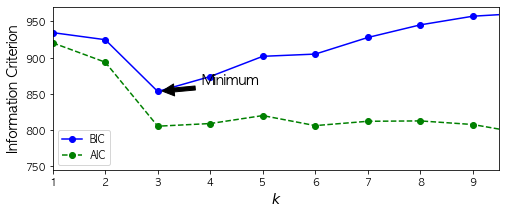

In [529]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [530]:
### Best K and covariance type
min_bic = np.infty
for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(x).bic(x)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [531]:
print(best_k, best_covariance_type)

4 tied


##### Bayesian Gaussian Mixture
- 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 수렴시킴
- 최적의 클러스터 개수보다 큰 컴포넌트의 개수 지정

In [532]:
from sklearn.mixture import BayesianGaussianMixture

In [533]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(x)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [534]:
np.round(bgm.weights_, 2) # 3개의 클러스터 감지

array([0.4 , 0.25, 0.34, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

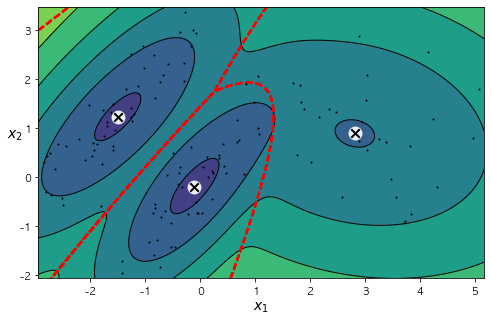

In [535]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, x)
plt.show()

In [536]:
### 클러스터 개수에 대한 사전 믿음(Prior belief) 지정
# weight_concentration_prior
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(x[:nn])
bgm_high.fit(x[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

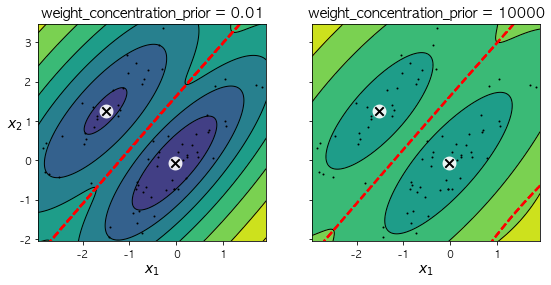

In [537]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, x[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, x[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()

In [538]:
### 반달 모양에는 잘 적합되지 않음
# 타원형에 적합
x_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [539]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(x_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

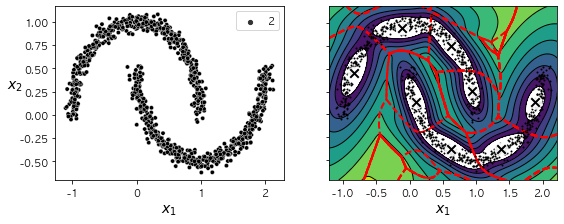

In [540]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
sns.scatterplot(x=x_moons[:, 0], y=x_moons[:, 1], color='black', size=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, x_moons, show_ylabels=False)

plt.show()

### (6) SOM
- Self-Organizing Maps
- unsupervised NN
- input layer - competitive layer (fully connected). 각 뉴런에서 거리를 구해, 승자 독점 학습

In [541]:
# !pip install minisom
from minisom import MiniSom

In [542]:
wine.reset_index(inplace=True, drop=True)
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  cluster  
0                          3.92   1065.0      0        0  
1                          3.40   1050.0      0        0  
2                          3.17   1185.0      0        0  
3                          3.45   1480.0      0        0  
4                          2.93    735.0      0        2

In [543]:
som_data = wine.drop(['Class', 'cluster'], axis=1)
som_target = wine['Class']

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
som_array = sc.fit_transform(som_data)

In [544]:
n_neurons = 5
m_neurons = 4

som = MiniSom(n_neurons, m_neurons, som_array.shape[1], sigma=1.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(som_array)
som.train_random(data=som_array, num_iteration=100)

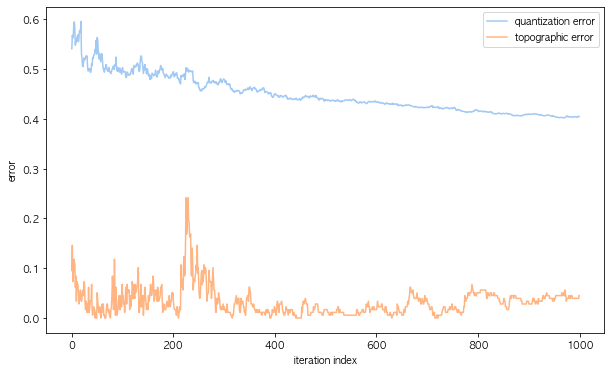

In [545]:
# iter에 따른 Error 시각화
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(som_array))
    som.update(som_array[rand_i], som.winner(som_array[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(som_array))
    t_error.append(som.topographic_error(som_array))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

In [546]:
som.winner(som_array[0])

(0, 2)

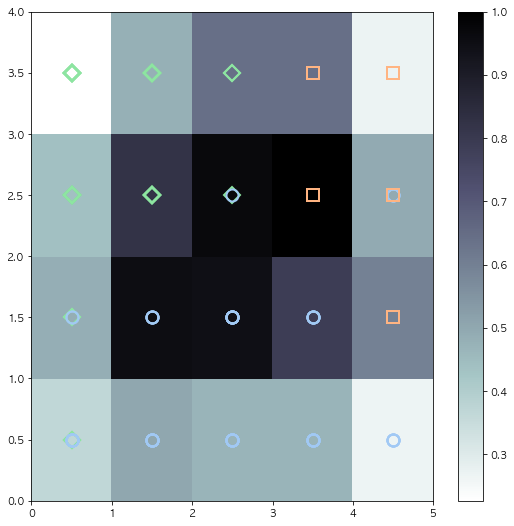

In [547]:
### SOM Visualization
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(som_array):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[som_target[cnt]-1], markerfacecolor='None', 
             markeredgecolor=colors[som_target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

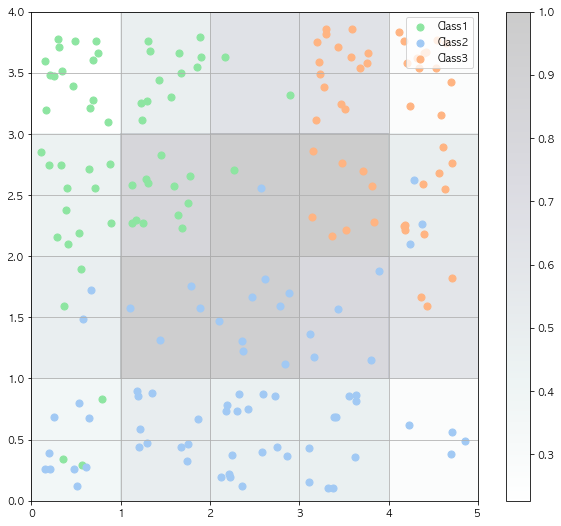

In [548]:
label_names = {0:'Class1', 1:'Class2', 2:'Class3'}

w_x, w_y = zip(*[som.winner(d) for d in som_array])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(som_target):
    idx_target = som_target==c
    plt.scatter(w_x[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) - .5) * .8,
                w_y[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) -.5) *.8, s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

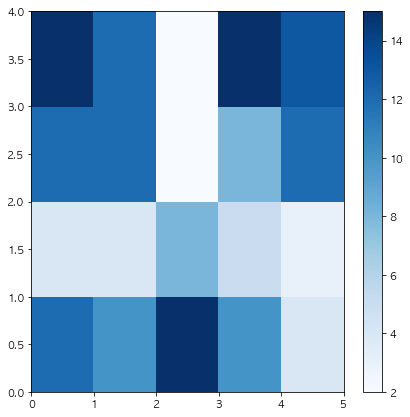

In [549]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(som_array)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [550]:
import matplotlib.gridspec as gridspec

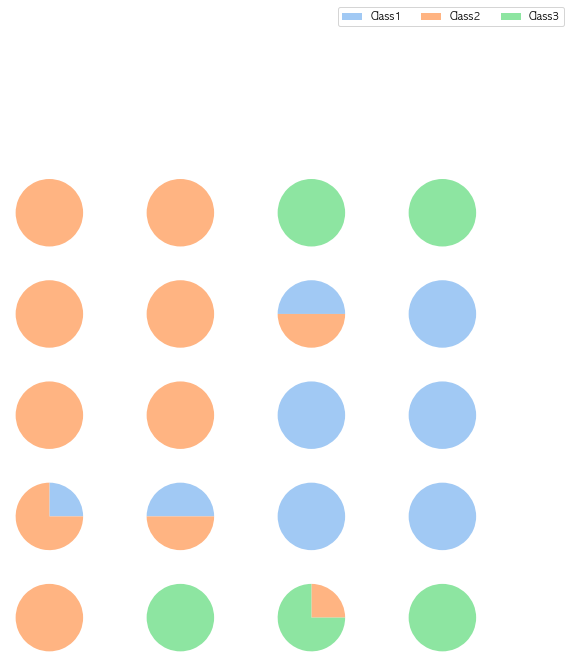

In [551]:
labels_map = som.labels_map(som_array, [label_names[t] for t in som_target.values])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[m_neurons-1-position[0], position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(2, 3), ncol=3)
plt.show()

### (7) DBSCAN
- Density Based Spatial Clusting of Applications with Noise
- 군집 개수를 사전에 결정하지 않는 알고리즘
- 초기 군집 개수를 정해주지 않아도 됨
- 주변 epsilon 거리의 데이터를 군집으로 인식하고, 최소 군집 데이터 수를 정할 수 있음
    - epsilon-이웃
    - epsilon-이웃 안에 min_samples 이상의 샘플이 있다면, core instance (밀집 지역의 샘플)
    - core instance의 이웃은 동일한 클러스터
    - 클러스터에 들어가지 못하면 이상치로 판단 (-1)
- 반달 형태의 군집에 잘 적합
- 새로운 데이터의 군집 예측 불가 (예측이 필요하면 KNN Classifier 사용)

In [552]:
x, y = make_moons(n_samples=100, noise=0.05, random_state=42)

In [553]:
from sklearn.cluster import DBSCAN

In [554]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [555]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [556]:
dbscan.core_sample_indices_[:10] # 핵심 샘플 index

array([], dtype=int64)

In [557]:
dbscan.components_[:3] # 핵심 샘플

array([], shape=(0, 2), dtype=float64)

In [558]:
np.unique(dbscan.labels_) # -1은 이상치

array([-1])

In [559]:
### 이웃 범위를 넓혀서 클러스터링
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x)

DBSCAN(eps=0.2)

In [560]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

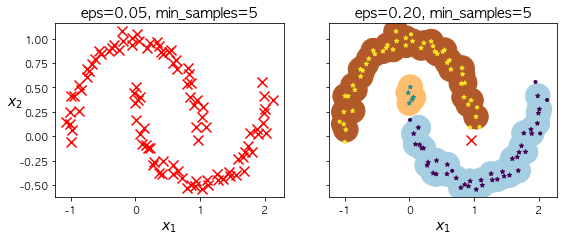

In [561]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x, size=600, show_ylabels=False)

plt.show()

In [562]:
from sklearn.neighbors import KNeighborsClassifier

In [563]:
### KNN을 이용한 새 데이터 예측 구현
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [564]:
x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(x_new)

array([2, 2, 0, 0])

In [565]:
knn.predict_proba(x_new)

array([[0.28, 0.1 , 0.62],
       [0.18, 0.1 , 0.72],
       [0.76, 0.02, 0.22],
       [0.6 , 0.  , 0.4 ]])

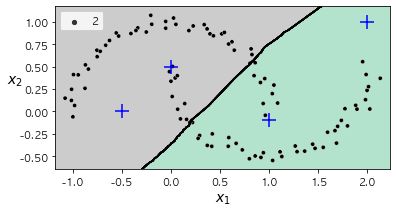

In [566]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, x, show_centroids=False)
plt.scatter(x_new[:, 0], x_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [567]:
y_dist, y_pred_idx = knn.kneighbors(x_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1, -1, -1, -1])

In [568]:
### iris data
feature = iris.iloc[:, :4]
feature.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [569]:
model = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')

In [570]:
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict],axis=1)
r['target'] = iris.Class
r.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   predict  target  
0        0  Setosa  
1        0  Setosa  
2        0  Setosa  
3        0  Setosa  
4        0  Setosa

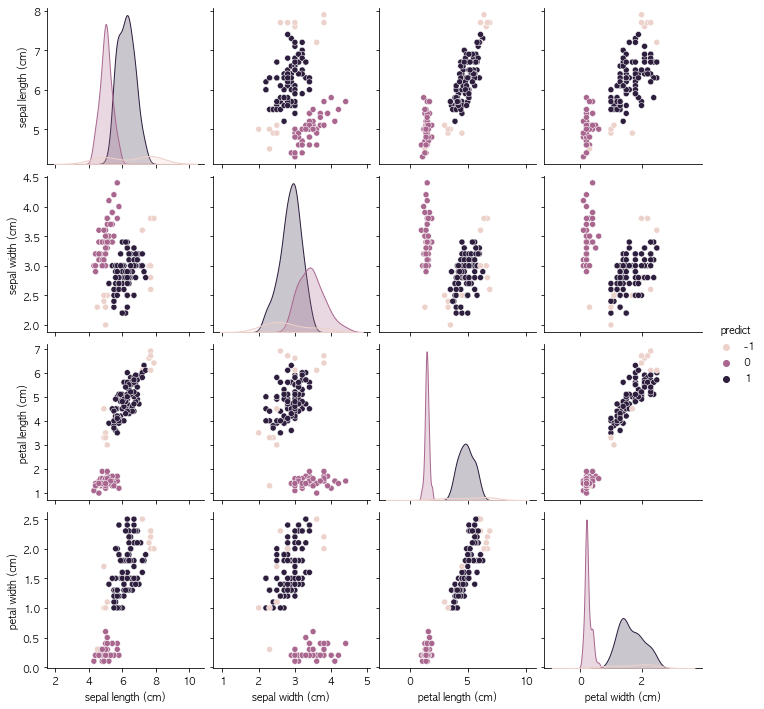

In [571]:
sns.pairplot(r, hue='predict')
plt.show()

In [572]:
iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

target       predict
Setosa        0         49
             -1          1
Versicolour   1         46
             -1          4
Virginica     1         42
             -1          8
Name: predict, dtype: int64


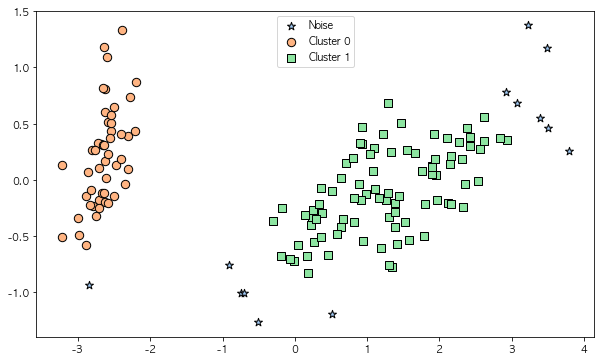

In [573]:
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(feature)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
r['ftr1'] = pca_transformed[:,0]
r['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(model, r, 'predict', is_center=False)

target       predict
Setosa        0         50
Versicolour   1         50
Virginica     1         47
             -1          3
Name: predict, dtype: int64


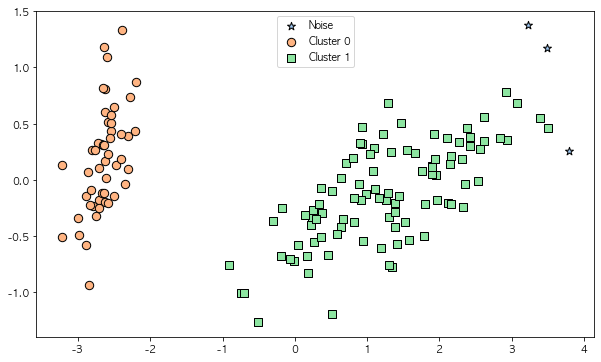

In [574]:
### eps 0.8로 상승 -> noise 감소
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature)

r['predict'] = dbscan_labels
r['target'] = iris.Class

iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, r, 'predict', is_center=False)

target       predict
Setosa        0         48
             -1          2
Versicolour   1         44
             -1          6
Virginica     1         36
             -1         14
Name: predict, dtype: int64


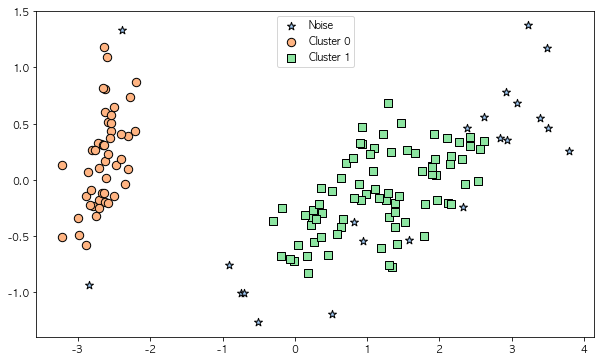

In [575]:
### min_samples 상승 -> noise 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature)

r['predict'] = dbscan_labels
r['target'] = iris.Class

iris_result = r.groupby(['target'])['predict'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, r, 'predict', is_center=False)

In [576]:
from sklearn.datasets import make_circles

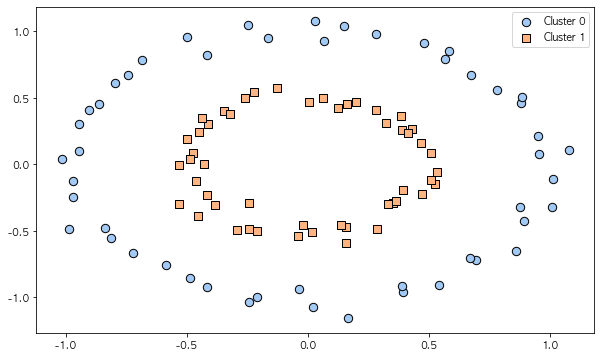

In [577]:
### make_circles dataset
x, y = make_circles(n_samples=100, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
cluster['target'] = y

visualize_cluster_plot(None, cluster, 'target', is_center=False)

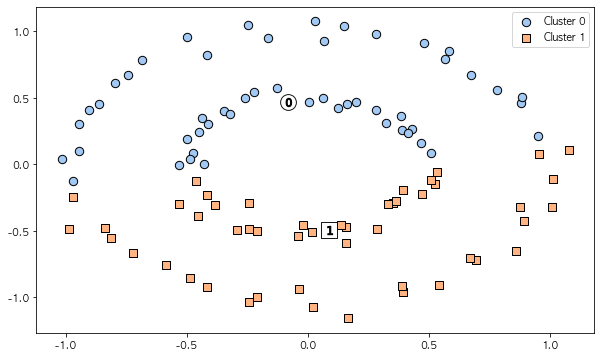

In [578]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(x)
cluster['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, cluster, 'kmeans_cluster', is_center=True)

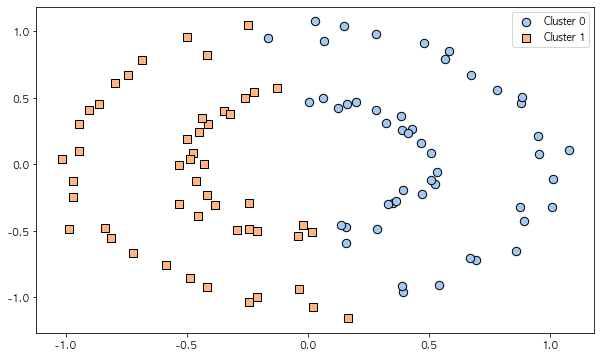

In [579]:
# GMM으로 make_circles() 데이터 셋을 클러스터링 수행. 
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(x).predict(x)
cluster['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, cluster, 'gmm_cluster', is_center=False)

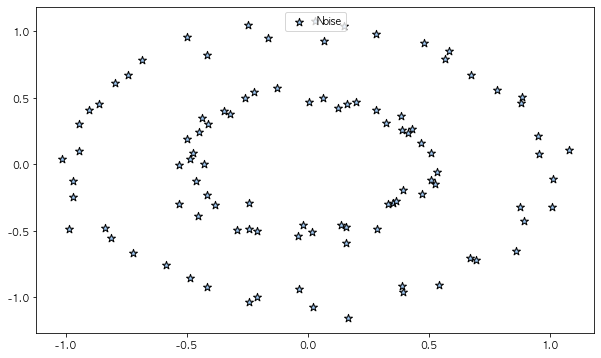

In [580]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x)
cluster['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, cluster, 'dbscan_cluster', is_center=False)

In [581]:
### Gower distance 사용
# 범주형 변수가 있는 경우
'''
import gower

distance_matrix = gower.gower_matrix(dataframe)
columns = [f'Customer_{i}' for i in range(1,11)]
distance_matrix = pd.DataFrame(distance_matrix, index=columns, columns=columns)

dbscan_cluster = DBSCAN(eps=0.3, min_samples=2, metric="precomputed")
dbscan_cluster.fit(distance_matrix)

dbscan_cluster.labels_
'''

'\nimport gower\n\ndistance_matrix = gower.gower_matrix(dataframe)\ncolumns = [f\'Customer_{i}\' for i in range(1,11)]\ndistance_matrix = pd.DataFrame(distance_matrix, index=columns, columns=columns)\n\ndbscan_cluster = DBSCAN(eps=0.3, min_samples=2, metric="precomputed")\ndbscan_cluster.fit(distance_matrix)\n\ndbscan_cluster.labels_\n'

### (8) Spectral clustering
- 샘플 사이 유사도 행렬을 받아 저차원 임베딩 (차원축소)
- 저차원 공간에서 군집 알고리즘 사용 (K-means)
- 샘플 개수가 많거나, 클러스터 크기가 다르면 성능 저하

In [582]:
from sklearn.cluster import SpectralClustering

In [583]:
sc1 = SpectralClustering(n_clusters=2, gamma=10, random_state=42)
sc1.fit(x)

sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(x)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [584]:
np.percentile(sc1.affinity_matrix_, 95)

0.6062259936328367

In [585]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

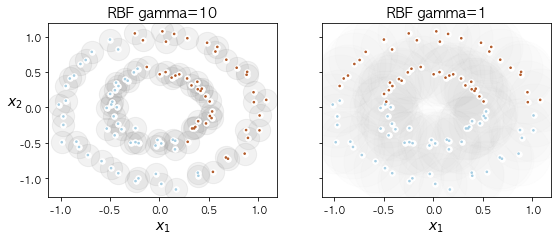

In [586]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, x, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, x, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

## Dimensional reduction
- Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법
- 데이터를 더 잘 설명할 수 있는 잠재적인 요소 추출
- 자료의 크기가 작을 경우 용이하고, 데이터가 크면 높은 차원이 유리할 수 있음

### (1) PCA
- Principal Component Analysis
- 자료의 변동이 최대한 보존되는 저차원 자료 생성
- SVD 알고리즘 기반으로 구현됨
-  PCA(SVD)는 반드시 StandardScaler로 스케일링 해야 함

In [587]:
from sklearn.decomposition import PCA

In [588]:
iris.drop(['pca_x', 'pca_y', 'silhouette_coeff', 'cluster_kme', 'cluster'], axis=1, inplace=True)

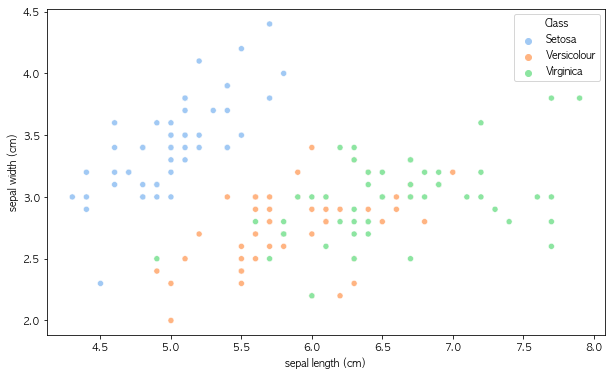

In [589]:
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], hue=iris.Class)
plt.show()

In [590]:
x = iris.drop(columns = 'Class') # 수치형 데이터만 추출
x = StandardScaler().fit_transform(x) # 수치형 변수 정규화

pd.DataFrame(x).head()

0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444

In [591]:
# 주성분 추출
pca = PCA(n_components=len(iris.columns.difference(['Class'])))
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


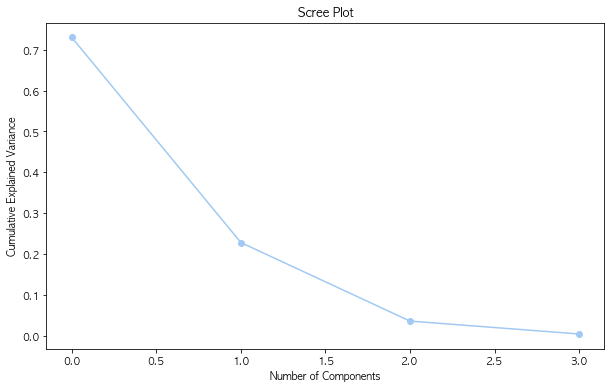

In [592]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [593]:
pca = PCA(n_components=2)                    
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2']) 
principal_iris.head()

pc1       pc2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835

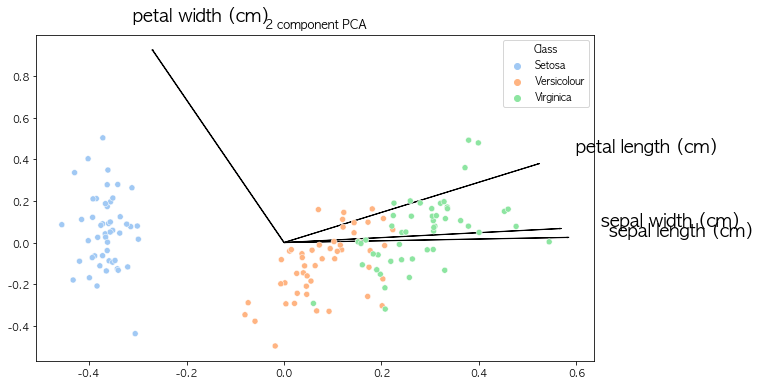

In [594]:
### Biplot
PC1 = pca.fit_transform(x)[:,0]
PC2 = pca.fit_transform(x)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = iris.columns.difference(['Class'])
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2, hue=iris.Class)
plt.title('2 component PCA')
plt.show()

In [595]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [596]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, x, iris.Class, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

pca_x = principal_iris[['pc1', 'pc2']]
scores_pca = cross_val_score(rcf, pca_x, iris.Class, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [597]:
### credit card

print(df.shape)
df.head(3)

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 24 columns]

In [598]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
x = df.drop('default', axis=1)
y = df['default']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

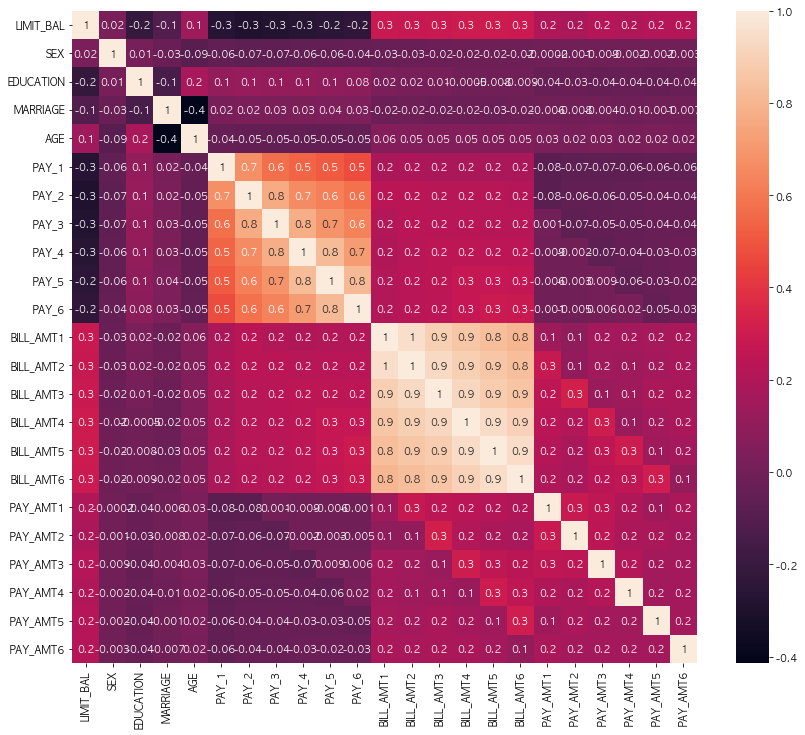

In [599]:
plt.figure(figsize=(14, 12))
sns.heatmap(x.corr(), annot=True, fmt='.1g')
plt.show()

In [600]:
# 상관성이 높은 변수만 PCA
# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x[cols_bill])
x.loc[:, cols_bill] = df_cols_scaled

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [601]:
rcf = RandomForestClassifier(n_estimators=30, random_state=156)
scores = cross_val_score(rcf, x, y, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8035 0.8166 0.8197]
평균 정확도: 0.8133


In [602]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7874 0.7951 0.7981]
PCA 변환 데이터 셋 평균 정확도:0.7935


In [603]:
### USArrest
usarrests.head()

Murder  Assault  UrbanPop  Rape  cluster
Alabama       13.2      236        58  21.2        1
Alaska        10.0      263        48  44.5        1
Arizona        8.1      294        80  31.0        1
Arkansas       8.8      190        50  19.5        2
California     9.0      276        91  40.6        1

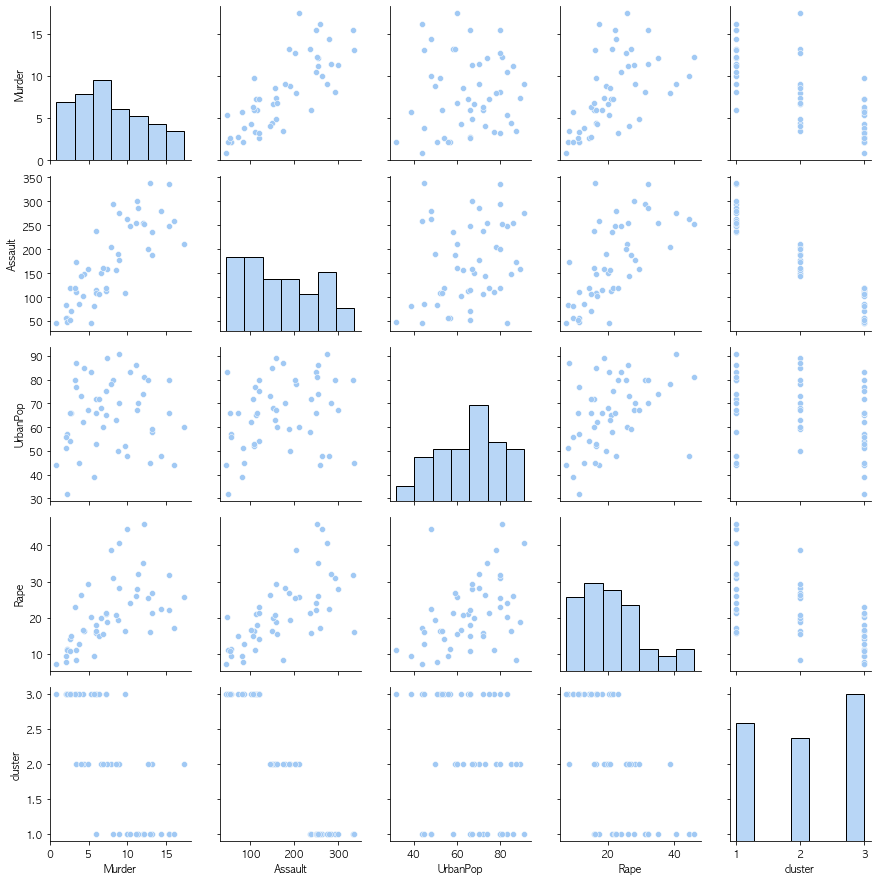

In [604]:
### 분포 확인
g = sns.PairGrid(usarrests)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [605]:
usarrests_scaled = StandardScaler().fit_transform(usarrests)
pd.DataFrame(usarrests_scaled).head()

0         1         2         3         4
0  1.255179  0.790787 -0.526195 -0.003451 -1.278487
1  0.513019  1.118060 -1.224067  2.509424 -1.278487
2  0.072361  1.493817  1.009122  1.053466 -1.278487
3  0.234708  0.233212 -1.084492 -0.186794 -0.094703
4  0.281093  1.275635  1.776781  2.088814 -1.278487

In [606]:
pca = PCA(n_components=len(usarrests.columns))
pca_fit = pca.fit(usarrests_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [12.84825703  7.09742266  4.38537174  3.58974203  1.55921446]
분산 설명력:  [0.66031084 0.20149363 0.07692594 0.05154499 0.0097246 ]


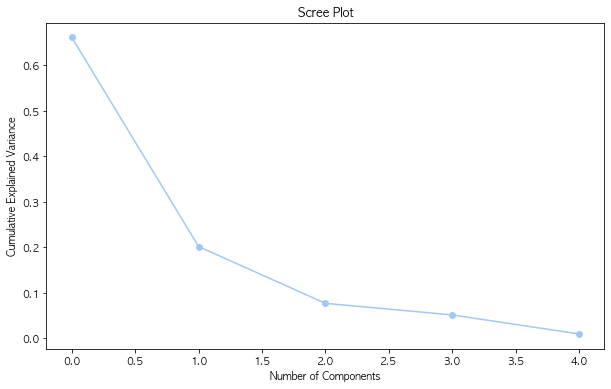

In [607]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [608]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(usarrests_scaled)
principal_usarrests = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_usarrests.index = usarrests.index
principal_usarrests.head()

pc1       pc2
Alabama     1.541890  1.164580
Alaska      2.343754  0.974211
Arizona     2.160046 -0.764090
Arkansas   -0.033222  1.133210
California  2.767393 -1.650587

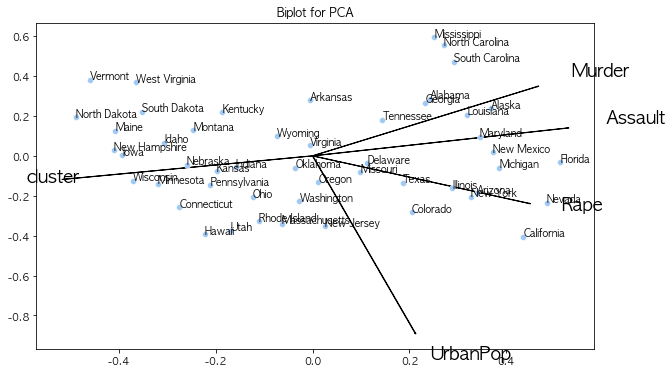

In [609]:
### Biplot
PC1 = pca.fit_transform(usarrests_scaled)[:,0]
PC2 = pca.fit_transform(usarrests_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = usarrests.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for city in principal_usarrests.index:
    plt.annotate(city, (principal_usarrests.loc[city, 'pc1']*scalePC1, principal_usarrests.loc[city, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [610]:
### Ramen data
ramen.head()

면  그릇  국물
쇠고기라면  2   4   5
해물라면   1   5   1
얼큰라면   5   3   4
떡라면    2   2   3
짬뽕라면   3   5   5

In [611]:
ramen_scaled = StandardScaler().fit_transform(ramen)

In [612]:
pca = PCA(n_components=len(ramen.columns))
pca_fit = pca.fit(ramen_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [3.96592216 2.8530831  2.47616199]
분산 설명력:  [0.52428462 0.27133611 0.20437927]


In [613]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(ramen_scaled)
principal_ramen = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_ramen.index = ramen.index
principal_ramen.head()

pc1       pc2
쇠고기라면 -0.750451  0.549867
해물라면   1.026739  1.993416
얼큰라면  -1.033449 -1.364739
떡라면    1.108269 -0.714791
짬뽕라면  -1.623445  0.831530

In [614]:
import matplotlib
import matplotlib.font_manager as fm

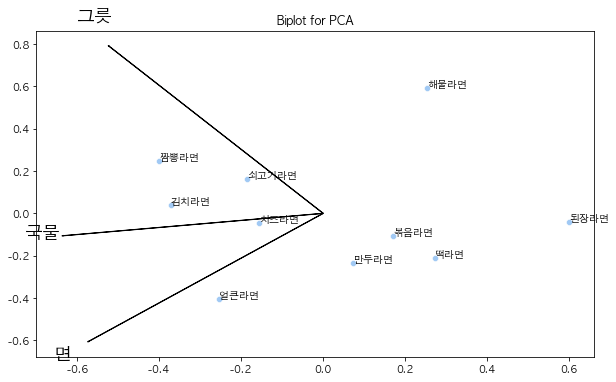

In [615]:
### Biplot
PC1 = pca.fit_transform(ramen_scaled)[:,0]
PC2 = pca.fit_transform(ramen_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ramen.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for score in principal_ramen.index:
    plt.annotate(score, (principal_ramen.loc[score, 'pc1']*scalePC1, principal_ramen.loc[score, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [616]:
### Computer data
computer.head()

Price  Software  Aesthetics  Brand
0      6         5           3      4
1      7         3           2      2
2      6         4           4      5
3      5         7           1      3
4      7         7           5      5

In [617]:
computer_scaled = StandardScaler().fit_transform(computer)

In [618]:
pca = PCA(n_components=len(computer.columns))
pca_fit = pca.fit(computer_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [6.23575624 3.92163681 2.72666932 1.51703106]
분산 설명력:  [0.60757275 0.24030055 0.11616759 0.03595911]


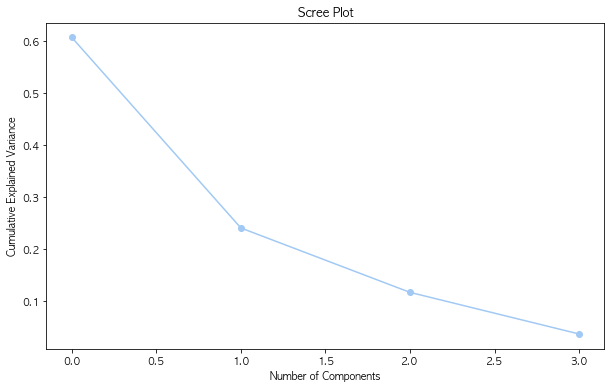

In [619]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [620]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(computer_scaled)
principal_computer = pd.DataFrame(data = principal_components, columns =['pc1', 'pc2'])
principal_computer.index = computer.index
principal_computer.head()

pc1       pc2
0  1.145209  0.205853
1  2.135793  1.826921
2  0.375393  0.720388
3  2.093693 -0.916507
4  0.690569 -1.394867

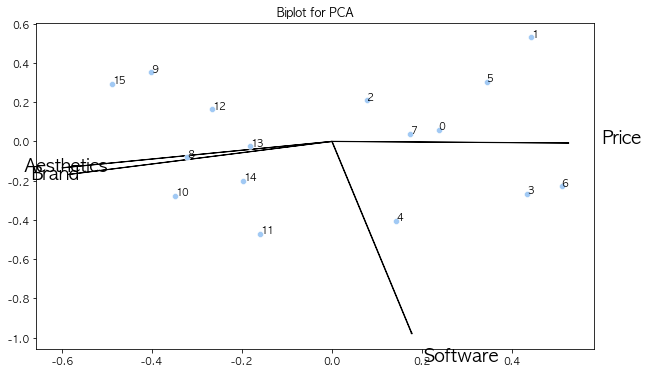

In [621]:
### Biplot
PC1 = pca.fit_transform(computer_scaled)[:,0]
PC2 = pca.fit_transform(computer_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = computer.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for score in principal_computer.index:
    plt.annotate(score, (principal_computer.loc[score, 'pc1']*scalePC1, principal_computer.loc[score, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

In [622]:
x = mnist["data"]
y = mnist["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [623]:
### PCA for Compression
pca = PCA(n_components=0.95) # 분산 설명 비율도 지정 가능
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [624]:
pca.n_components_ # image 차원

154

In [625]:
np.sum(pca.explained_variance_ratio_) # 분산 설명량 합

0.9504233611892169

In [626]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

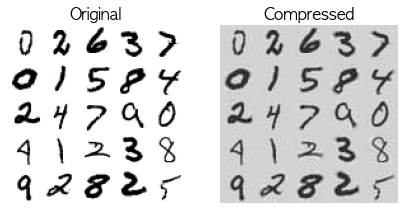

In [627]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [628]:
### Random PCA
# 처음 d개의 주성분 근삿값을 빠르게 찾아 줌
# 속도가 빠름
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
x_reduced = rnd_pca.fit_transform(x_train)

In [629]:
from sklearn.decomposition import IncrementalPCA

In [630]:
### Incremental PCA
# 조금씩 데이터를 쌓아가면서 PCA 구현
# 메모리 사용량 조절
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(x_batch)

x_reduced_inc = inc_pca.transform(x_train)

....................................................................................................

In [631]:
x_recovered_inc_pca = inc_pca.inverse_transform(x_reduced_inc)

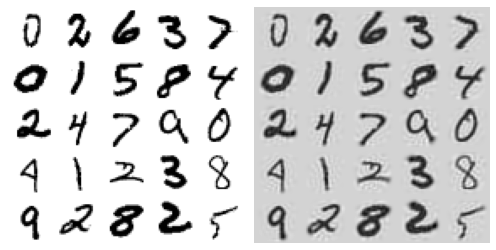

In [632]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.subplot(122)
plot_digits(x_recovered_inc_pca[::2100])
plt.tight_layout()

In [633]:
# 평균은 같으나, 결과가 완전히 동일하지는 않음
print(np.allclose(pca.mean_, inc_pca.mean_))
print(np.allclose(x_reduced, x_reduced_inc))

True
False


In [634]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

In [635]:
### kernel PCA
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

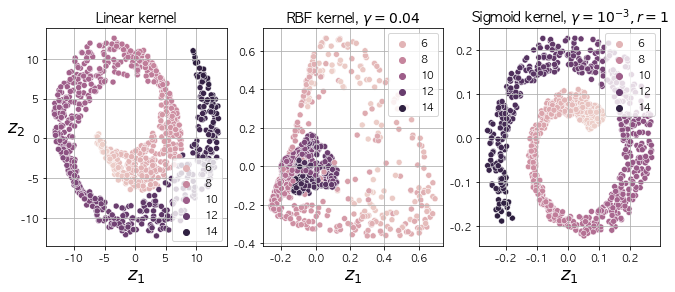

In [636]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    x_reduced = pca.fit_transform(x)
    if subplot == 132:
        x_reduced_rbf = x_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [637]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

In [638]:
### Hyperparameter tuning with kernels
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [639]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [640]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_preimage = rbf_pca.inverse_transform(x_reduced)

In [641]:
mean_squared_error(x, x_preimage)

32.78630879576617

### (2) LLE
- Locally Linear Embedding
- 비선형 차원 축소
- 각 train sample이 가장 가까운 이웃과 얼마나 선형적으로 연관되는지 측정
- 큰 데이터에는 적용 어려움

In [642]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [643]:
from sklearn.manifold import LocallyLinearEmbedding

In [644]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
x_reduced = lle.fit_transform(x)

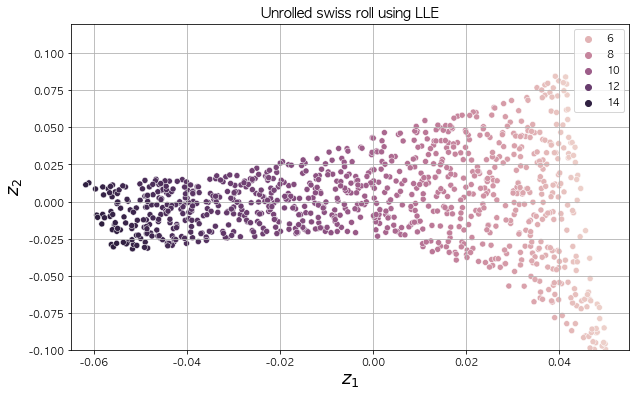

In [645]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

### (3) Isomap
- 각 sample을 가장 가까운 이웃과 연결
- sample들의 geodesic distance (두 노드의 최단거리 노드 개수) 유지하면서 차원 축소

In [646]:
from sklearn.manifold import Isomap

In [647]:
isomap = Isomap(n_components=2)
x_reduced_isomap = isomap.fit_transform(x)

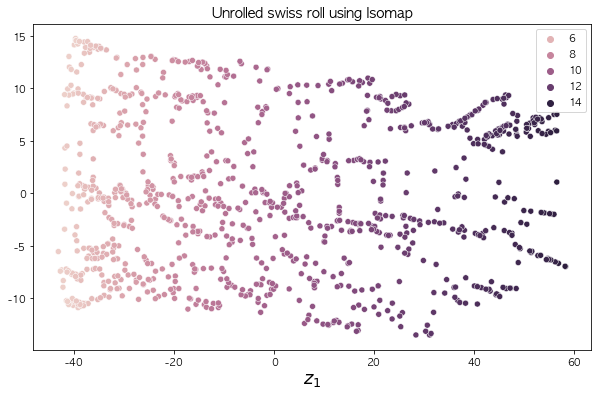

In [648]:
plt.title("Unrolled swiss roll using Isomap", fontsize=14)
sns.scatterplot(x=x_reduced_isomap[:, 0], y=x_reduced_isomap[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

### (4) t-SNE
- t-distributed Stochastic Neighbor Embedding
- 비슷한 sample은 가까이, 비슷하지 않은 sample은 멀리 
- 쿨백-라이블러 발산 (KLD) 최소화
- 주로 2D 시각화에 사용

In [649]:
from sklearn.manifold import TSNE

In [650]:
tsne = TSNE(n_components=2, random_state=42)
x_reduced_tsne = tsne.fit_transform(x)

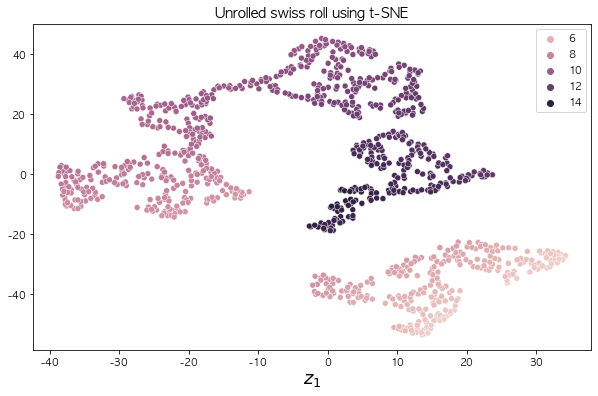

In [651]:
plt.title("Unrolled swiss roll using t-SNE", fontsize=14)
sns.scatterplot(x=x_reduced_tsne[:, 0], y=x_reduced_tsne[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

### (5) MDS
- Multidimensional Scaling
- 여러 대상 간의 거리가 주어져 있고, 동일한 상대적 거리를 가진 실수공간의 점들로 배치시키는 방법
- 데이터 포인트의 유사성을 학습하여 자료들의 상대적 관계 이해

In [652]:
from sklearn.manifold import MDS

In [653]:
mds = MDS(n_components=2, random_state=42)
x_reduced_mds = mds.fit_transform(x)

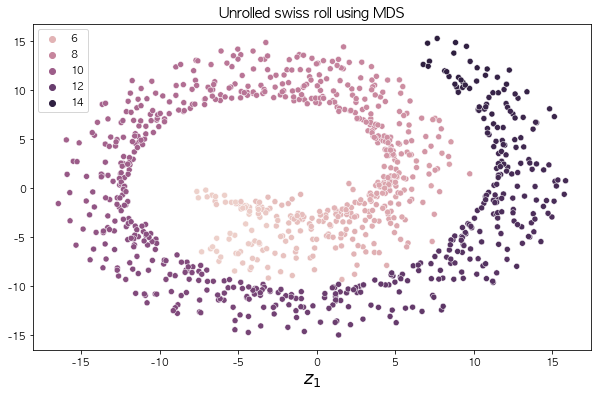

In [654]:
plt.title("Unrolled swiss roll using MDS", fontsize=14)
sns.scatterplot(x=x_reduced_mds[:, 0], y=x_reduced_mds[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)

plt.show()

In [655]:
### eurodist data
eurodist.head()

Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne  \
city                                                                 
Athens          0       3313      2963    3175       3339     2762   
Barcelona    3313          0      1318    1326       1294     1498   
Brussels     2963       1318         0     204        583      206   
Calais       3175       1326       204       0        460      409   
Cherbourg    3339       1294       583     460          0      785   

           Copenhagen  Geneva  Gibraltar  Hamburg  ...  Lisbon  Lyons  Madrid  \
city                                               ...                          
Athens           3276    2610       4485     2977  ...    4532   2753    3949   
Barcelona        2218     803       1172     2018  ...    1305    645     636   
Brussels          966     677       2256      597  ...    2084    690    1558   
Calais           1136     747       2224      714  ...    2052    739    1550   
Cherbourg        1545     853       2047     1115  ...    1827    789    1347   

           Marseilles  Milan  Munich  Paris  Rome  Stockholm  Vienna  
city                                                                  
Athens           2865   2282    2179   3000   817       3927    1991  
Barcelona         521   1014    1365   1033  1460       2868    1802  
Brussels         1011    925     747    285  1511       1616    1175  
Calais           1059   1077     977    280  1662       1786    1381  
Cherbourg        1101   1209    1160    340  1794       2196    1588  

[5 rows x 21 columns]

In [656]:
mds = MDS()
eurodist_transform = mds.fit_transform(eurodist)
eurodist_transform_df = pd.DataFrame(eurodist_transform)
eurodist_transform_df.index = eurodist.index
eurodist_transform_df.columns = ['x', 'y']

In [657]:
eurodist_transform_df.head()

x            y
city                               
Athens     8197.568923 -2389.180470
Barcelona  -185.540540  2812.946375
Brussels  -2558.485128  -788.757912
Calais    -2476.281793  -486.301904
Cherbourg -2169.970396   482.866835

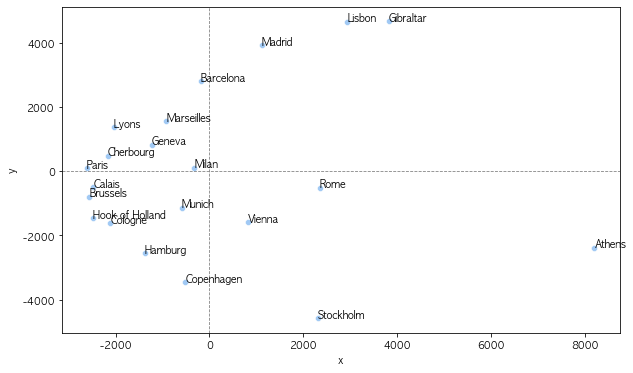

In [658]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=eurodist_transform_df['x'], y=eurodist_transform_df['y'])

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)

for language in eurodist_transform_df.index:
    plt.annotate(language, (eurodist_transform_df.loc[language, 'x'], eurodist_transform_df.loc[language, 'y']))
    
plt.show()

### (6) CA
- Correspondence Analysis
- MDS의 범주형 버전
- 범주형 변수(수준)들 간의 연관성을 분석한 후, 그 결과를 시각적 해석이 용이하도록 그래프화
- 범주형 변수의 빈도를 나타내고 있는 빈도교차표의 행과 열(명목변수의 범주 값들)을 그래프상의 자극점 형태로 표시하는 방법
- 단순 상응분석은 2개의 변수, 다중 상응분석은 3개 이상의 변수 활용
- 카이제곱 검정과 같이 범주형 변수간의 상호연관성을 바탕으로 진행되므로, 범주형 변수가 서로 연관성을 가지고 있다는 전제가 필요함

In [659]:
# !pip install prince
import prince

In [660]:
### Simple CA
x = pd.DataFrame(data=[[326, 38, 241, 110, 3], [688, 116, 584, 188, 4],
                       [343, 84, 909, 412, 26], [98, 48, 403, 681, 85]],
                 columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']), index=pd.Series(['Blue', 'Light', 'Medium', 'Dark']))

x.columns.rename('Hair color', inplace=True)
x.index.rename('Eye color', inplace=True)
x.head()

Hair color  Fair  Red  Medium  Dark  Black
Eye color                                 
Blue         326   38     241   110      3
Light        688  116     584   188      4
Medium       343   84     909   412     26
Dark          98   48     403   681     85

In [661]:
ca = prince.CA()
ca.fit(x)

In [662]:
### row coordinates
coords_r = ca.row_coordinates(x)
coords_r.columns = ['x', 'y']
coords_r

x         y
Eye color                    
Blue      -0.400300 -0.165411
Light     -0.440708 -0.088463
Medium     0.033614  0.245002
Dark       0.702739 -0.133914

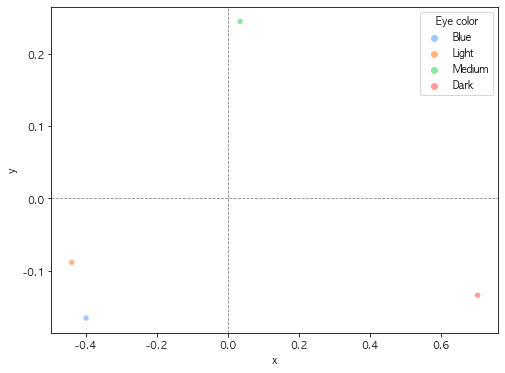

In [663]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_r, hue=coords_r.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [664]:
### column coordinates
coords_c = ca.column_coordinates(x)
coords_c.columns = ['x', 'y']
coords_c

x         y
Hair color                    
Fair       -0.543995 -0.173844
Red        -0.233261 -0.048279
Medium     -0.042024  0.208304
Dark        0.588709 -0.103950
Black       1.094388 -0.286437

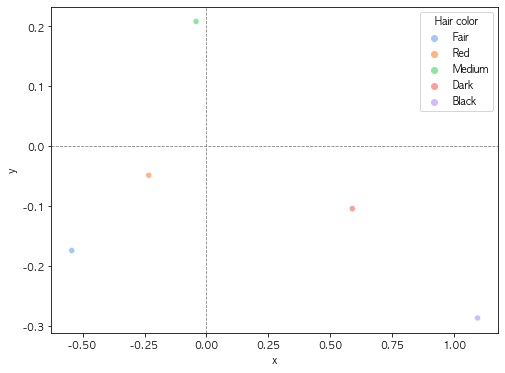

In [665]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_c, hue=coords_c.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [666]:
### Multiple CA
stretch.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
stretch.head()

Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T

In [667]:
mca = prince.MCA()
mca.fit_transform(stretch)

0             1
0   0.705387  9.084235e-15
1  -0.386586  6.949708e-15
2  -0.386586  7.989232e-15
3  -0.852014  6.737549e-15
4   0.783539 -6.333333e-01
5   0.783539 -6.333333e-01
6  -0.308434 -6.333333e-01
7  -0.308434 -6.333333e-01
8  -0.773862 -6.333333e-01
9   0.783539  6.333333e-01
10  0.783539  6.333333e-01
11 -0.308434  6.333333e-01
12 -0.308434  6.333333e-01
13 -0.773862  6.333333e-01
14  0.861691 -6.276341e-15
15  0.861691 -6.276341e-15
16 -0.230282 -8.410868e-15
17 -0.230282 -7.371344e-15
18 -0.695710 -8.623027e-15

In [668]:
### 차원 좌표
coords = mca.column_coordinates(stretch)
coords.columns = ['x', 'y']
coords

x             y
Color_PURPLE    0.117308  6.892024e-01
Color_YELLOW   -0.130342 -7.657805e-01
Size_LARGE      0.117308 -6.892024e-01
Size_SMALL     -0.130342  7.657805e-01
Action_DIP     -0.853864 -2.037959e-16
Action_STRETCH  0.620992  1.872995e-16
Age_ADULT       0.620992  1.079135e-15
Age_CHILD      -0.853864 -1.470106e-15
Inflated_F     -0.731466 -5.841431e-16
Inflated_T      1.253942  1.068422e-15

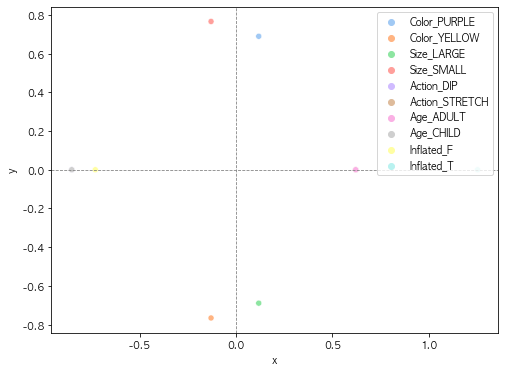

In [669]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords, hue=coords.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [670]:
mca.eigenvalues_

array([0.40165657, 0.21111111])

In [671]:
mca.total_inertia_

1.0

### (7) LDA
- Linear Discriminant Analysis
- 분류 알고리즘으로 사용되기도 함
- Train 과정에서 class를 가장 잘 구분하는 축 학습
- 클래스 내 분산과 클래스 내부 분산의 비율 최대화
- StandardScaler로 스케일링 해야 함

In [672]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [673]:
x = loan3000[['borrower_score', 'payment_inc_ratio']]
y = loan3000['outcome']

pd.concat([x, y], axis=1)

In [675]:
loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(x, y)
pd.DataFrame(loan_lda.scalings_, index=x.columns)

0
borrower_score     7.175839
payment_inc_ratio -0.099676

In [676]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns=loan_lda.classes_)
pred.head()

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


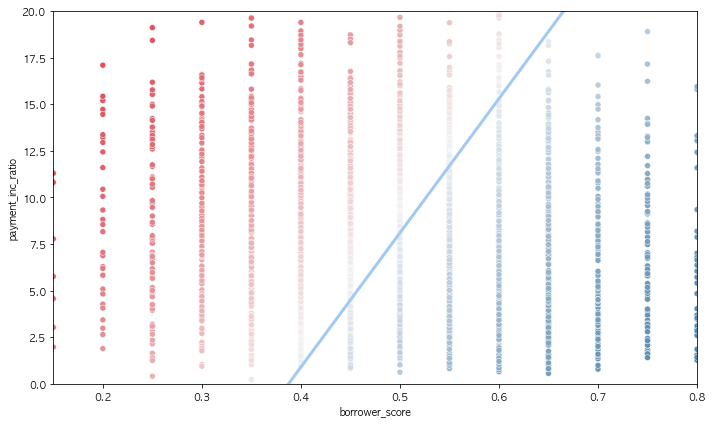

In [677]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, 
                palette=sns.diverging_palette(240, 10, n=9, as_cmap=True), legend=False)

plt.plot((x_0, x_20), (0, 20), linewidth=3)

plt.ylim(0, 20)
plt.xlim(0.15, 0.8)


plt.tight_layout()
plt.show()

In [678]:
### mnist
lda = LinearDiscriminantAnalysis(n_components=2)

x_mnist = mnist["data"]
y_mnist = mnist["target"]

In [679]:
lda.fit(x_mnist, y_mnist)
x_reduced_lda = lda.transform(x_mnist)

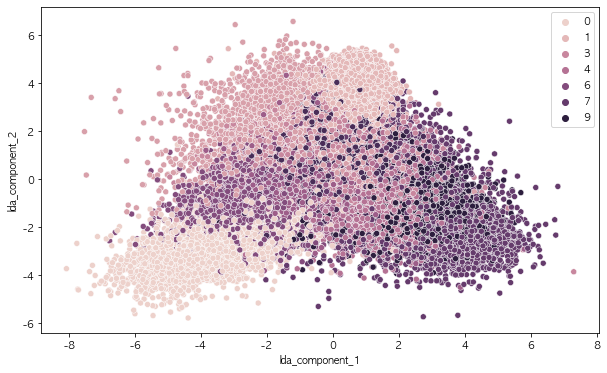

In [680]:
lda_columns = ['lda_component_1','lda_component_2']
mnist_lda = pd.DataFrame(x_reduced_lda, columns=lda_columns)
sns.scatterplot(x=mnist_lda['lda_component_1'], y=mnist_lda['lda_component_2'], hue=y_mnist)
plt.show()

In [681]:
### iris data
x = iris.drop(columns = 'Class')
iris_scaled = StandardScaler().fit_transform(x)

In [682]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.Class)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


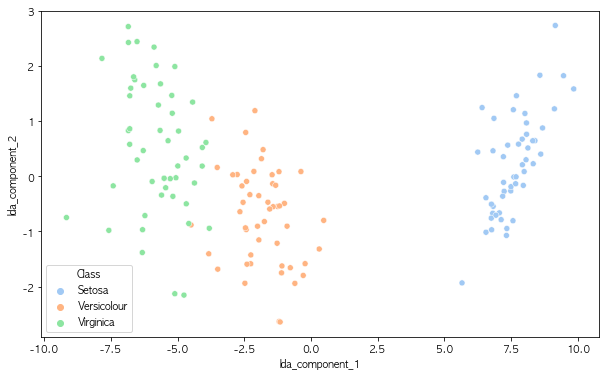

In [683]:
lda_columns = ['lda_component_1', 'lda_component_2']
iris_lda = pd.DataFrame(iris_lda, columns=lda_columns)
sns.scatterplot(x=iris_lda['lda_component_1'], y=iris_lda['lda_component_2'], hue=iris.Class)
plt.show()

### (8) QDA
- Quadratic Discriminant Analysis
- 2차 판별분석

In [684]:
# 데이터 생성
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [685]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [686]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x, y)

QuadraticDiscriminantAnalysis()

In [687]:
clf.predict([[-0.8, -1]])

array([1])

### (9) ICA
- Independent Component Analysis
- Feature에 들어있는 독립 신호 추출
- 독립적인 feature를 추출하려고 하기 때문에, 새로운 각 축은 직교하지 않을 수 있음 (PCA와의 차이점)
- 신호 처리 작업에 주로 사용

In [688]:
from sklearn.decomposition import FastICA

In [689]:
fastICA = FastICA(n_components=2, algorithm='parallel', max_iter=100, random_state=1)

In [690]:
x_mnist_ica = fastICA.fit_transform(x_mnist)

<AxesSubplot:>

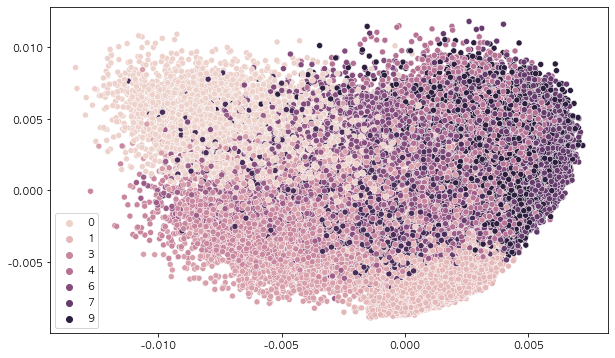

In [691]:
sns.scatterplot(x=x_mnist_ica.T[0], y=x_mnist_ica.T[1], hue=y_mnist)

### (10) SVD
- Singular Value Decomposition
- 희소 행렬의 변환 가능
- 패턴 인식, 토픽 모델링, 문서 클러스터링, 상품 추천 등

In [692]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds

In [693]:
# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [694]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [695]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [696]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [697]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [698]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [699]:
### Truncated SVD
# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

In [700]:
from sklearn.decomposition import TruncatedSVD, PCA

Text(0, 0.5, 'TruncatedSVD Component 2')

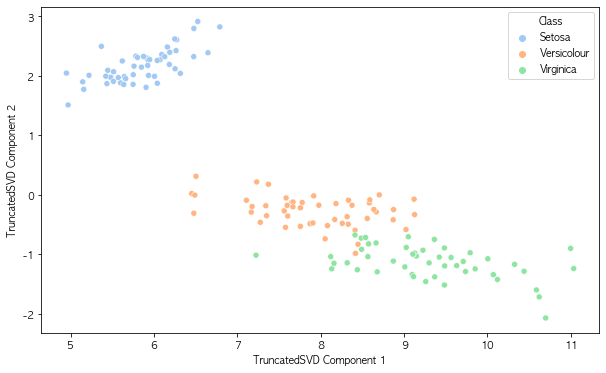

In [701]:
### TruncatedSVD from scikit-learn
# 분해한 행렬을 반환하지는 않고, 차원 축소 변환
iris_ftrs = iris.iloc[:, :4]

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0, 0.5, 'TruncatedSVD Component 2')

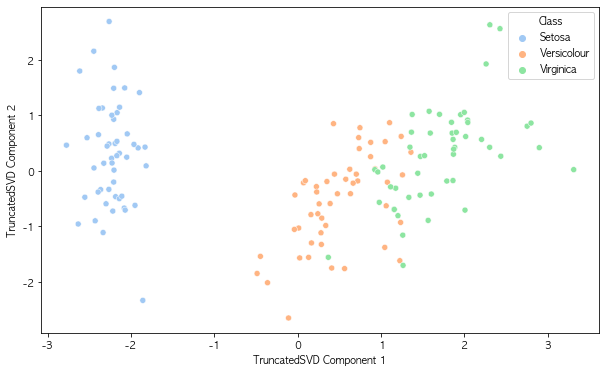

In [702]:
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# TruncatedSVD 변환 데이터 표현
# PCA 축소 결과와 거의 동일
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

### (11) NMF
- Non-Negative Matrix Factorization
- SVD와 유사한, 낮은 랭크 행렬 근사 방법
- 사용 분야도 SVD와 유사
- 원본 행렬이 모두 양수일 때, 두 개의 양수 행렬로 분해
- 스케일링 하면 안됨, 하더라도 MinMaxScaler 해야 함

In [703]:
from sklearn.decomposition import NMF

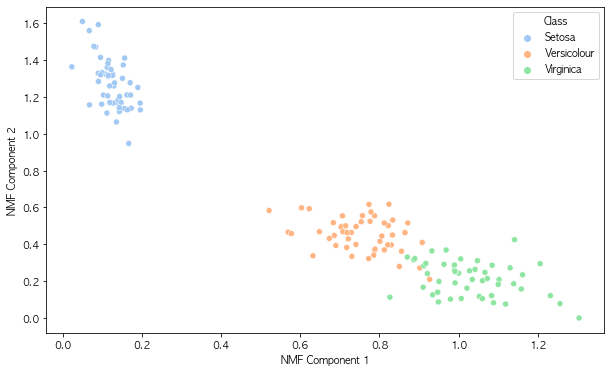

In [704]:
iris_ftrs = iris.iloc[:, :4]

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

sns.scatterplot(x=iris_nmf[:,0], y=iris_nmf[:,1], hue=iris.Class)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

### (11) FA
- Factor Analysis (요인분석)
- 유사한 변수를 묶어 다중공선성을 줄이는 것이 목적
- 공동 요인을 이용하여 변수의 상관 구조 분석
- Clustering과 유사하나, 분석가의 사전 지식이 어느 정도 필요함

In [705]:
bfi.drop(['gender', 'education', 'age'], axis=1, inplace=True)
bfi.dropna(inplace=True)
bfi.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3  \
61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  3.0  4.0  2.0   
61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  3.0  3.0  3.0   
61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  4.0  5.0  4.0   
61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  2.0  5.0  2.0   
61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  2.0  3.0  4.0   

        N4   N5   O1  O2   O3   O4   O5  
61617  2.0  3.0  3.0   6  3.0  4.0  3.0  
61618  5.0  5.0  4.0   2  4.0  3.0  3.0  
61620  2.0  3.0  4.0   2  5.0  5.0  2.0  
61621  4.0  1.0  3.0   3  4.0  3.0  5.0  
61622  4.0  3.0  3.0   3  4.0  3.0  3.0  

[5 rows x 25 columns]

In [706]:
# !pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [707]:
### 데이터 세트의 “인자 가능성”을 평가
# 요인 분석 가능성은 “데이터 세트에서 요인을 찾을 수 있는가?”를 의미함
# 바틀렛 테스트: 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인. 귀무가설을 기각해야 요인분석 진행 가능
# -> H0: 모집단의 상관행렬은 단위행렬과 동일하다 / H1:  모집단의 상관행렬은 단위행렬과 동일하지 않다
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value # 유의함.

(18146.065577235022, 0.0)

In [708]:
# KMO(Kaiser-Meyer-Olkin) 테스트
# -> 요인 분석에 대한 데이터의 적합성 측정. 모든 관측 변수 간의 분산 비율을 추정하며, KMO 값의 범위는 0에서 1 사이
# -> 0.6 미만의 KMO 값은 부적합한 것으로 간주함
kmo_all, kmo_model = calculate_kmo(bfi)
kmo_model

0.8486452309468395

In [709]:
from factor_analyzer import FactorAnalyzer

In [710]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(bfi, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

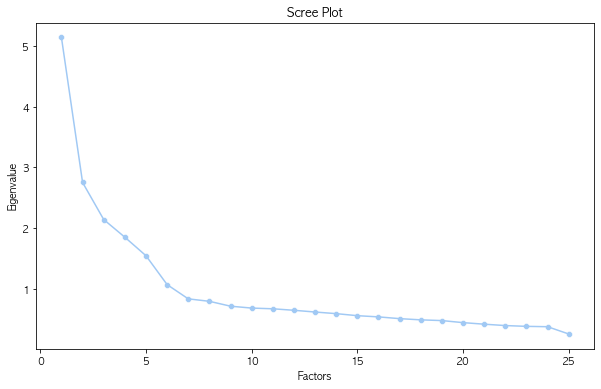

In [711]:
# Create scree plot
sns.scatterplot(x=range(1, bfi.shape[1]+1), y=ev)
sns.lineplot(x=range(1, bfi.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [712]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(bfi)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

<AxesSubplot:>

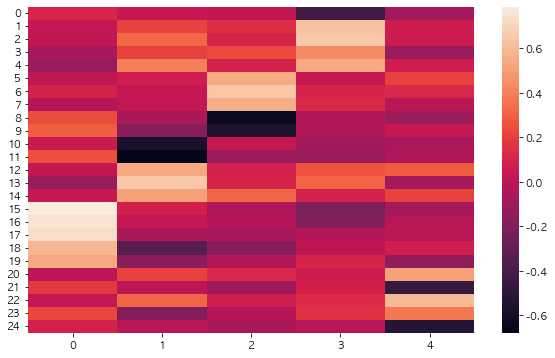

In [713]:
# 요인 적재량
sns.heatmap(pd.DataFrame(fa.loadings_))

In [714]:
# SS Loadings
# Proportion Var
# Cumulative Var
fa.get_factor_variance()

(array([2.70963262, 2.47308982, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

In [715]:
from sklearn.decomposition import FactorAnalysis

In [716]:
### Scikit-learn
fa = FactorAnalysis(n_components=5, rotation="varimax")
fa.fit(bfi)

FactorAnalysis(n_components=5, rotation='varimax')

<AxesSubplot:>

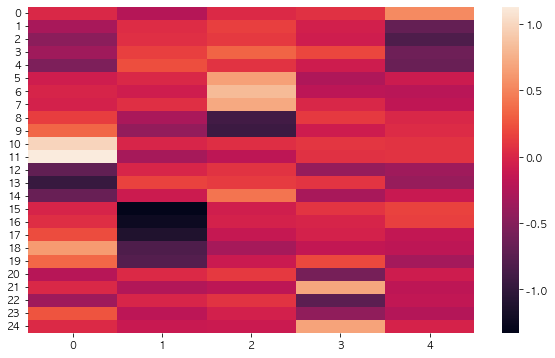

In [717]:
### 요인 적재 행렬 
sns.heatmap(pd.DataFrame(fa.components_).T)

In [718]:
# The estimated noise variance for each feature
fa.noise_variance_ 

array([1.63948936, 0.79959992, 0.80401417, 1.5220757 , 0.82419538,
       1.00515335, 0.9897638 , 1.12694924, 0.96456765, 1.49181394,
       1.67908697, 1.18046475, 1.01763303, 1.00548583, 1.067968  ,
       0.68998572, 0.79163628, 1.20884314, 1.2495894 , 1.7524464 ,
       0.85538357, 1.79549585, 0.75626997, 1.07088509, 1.26833739])

In [719]:
bfi_trans_df = pd.DataFrame(fa.transform(bfi))
bfi_trans_df

0         1         2         3         4
0    -0.153588  0.204795 -1.139972  1.551594  0.860195
1    -0.515970 -0.070053 -0.630235  0.196533  0.165677
2    -0.246942 -0.708131  0.051659 -0.238087  0.696860
3    -0.065624  0.131695 -1.045406  1.008858 -0.077362
4    -0.368067  0.245645 -0.040606  0.675983  0.779880
...        ...       ...       ...       ...       ...
2431  1.294707 -1.358452 -0.076894 -0.446021  0.933602
2432 -0.149995 -0.759848 -0.604543 -1.081443  0.251889
2433 -0.682748 -0.018803  0.845983 -0.937561  1.029193
2434 -0.497376 -1.179826  0.099787 -0.745508  1.857543
2435  1.236819  1.477643  0.049164  0.295011  2.125499

[2436 rows x 5 columns]